In [1]:
import pandas as pd
hr_data = pd.read_csv('Human_Resuorces_Analytics.csv')
#dropping illogical values record 
hr_data = hr_data.drop(hr_data[hr_data['EmpID'] ==10305].index)

hr_data_copy=hr_data.copy()


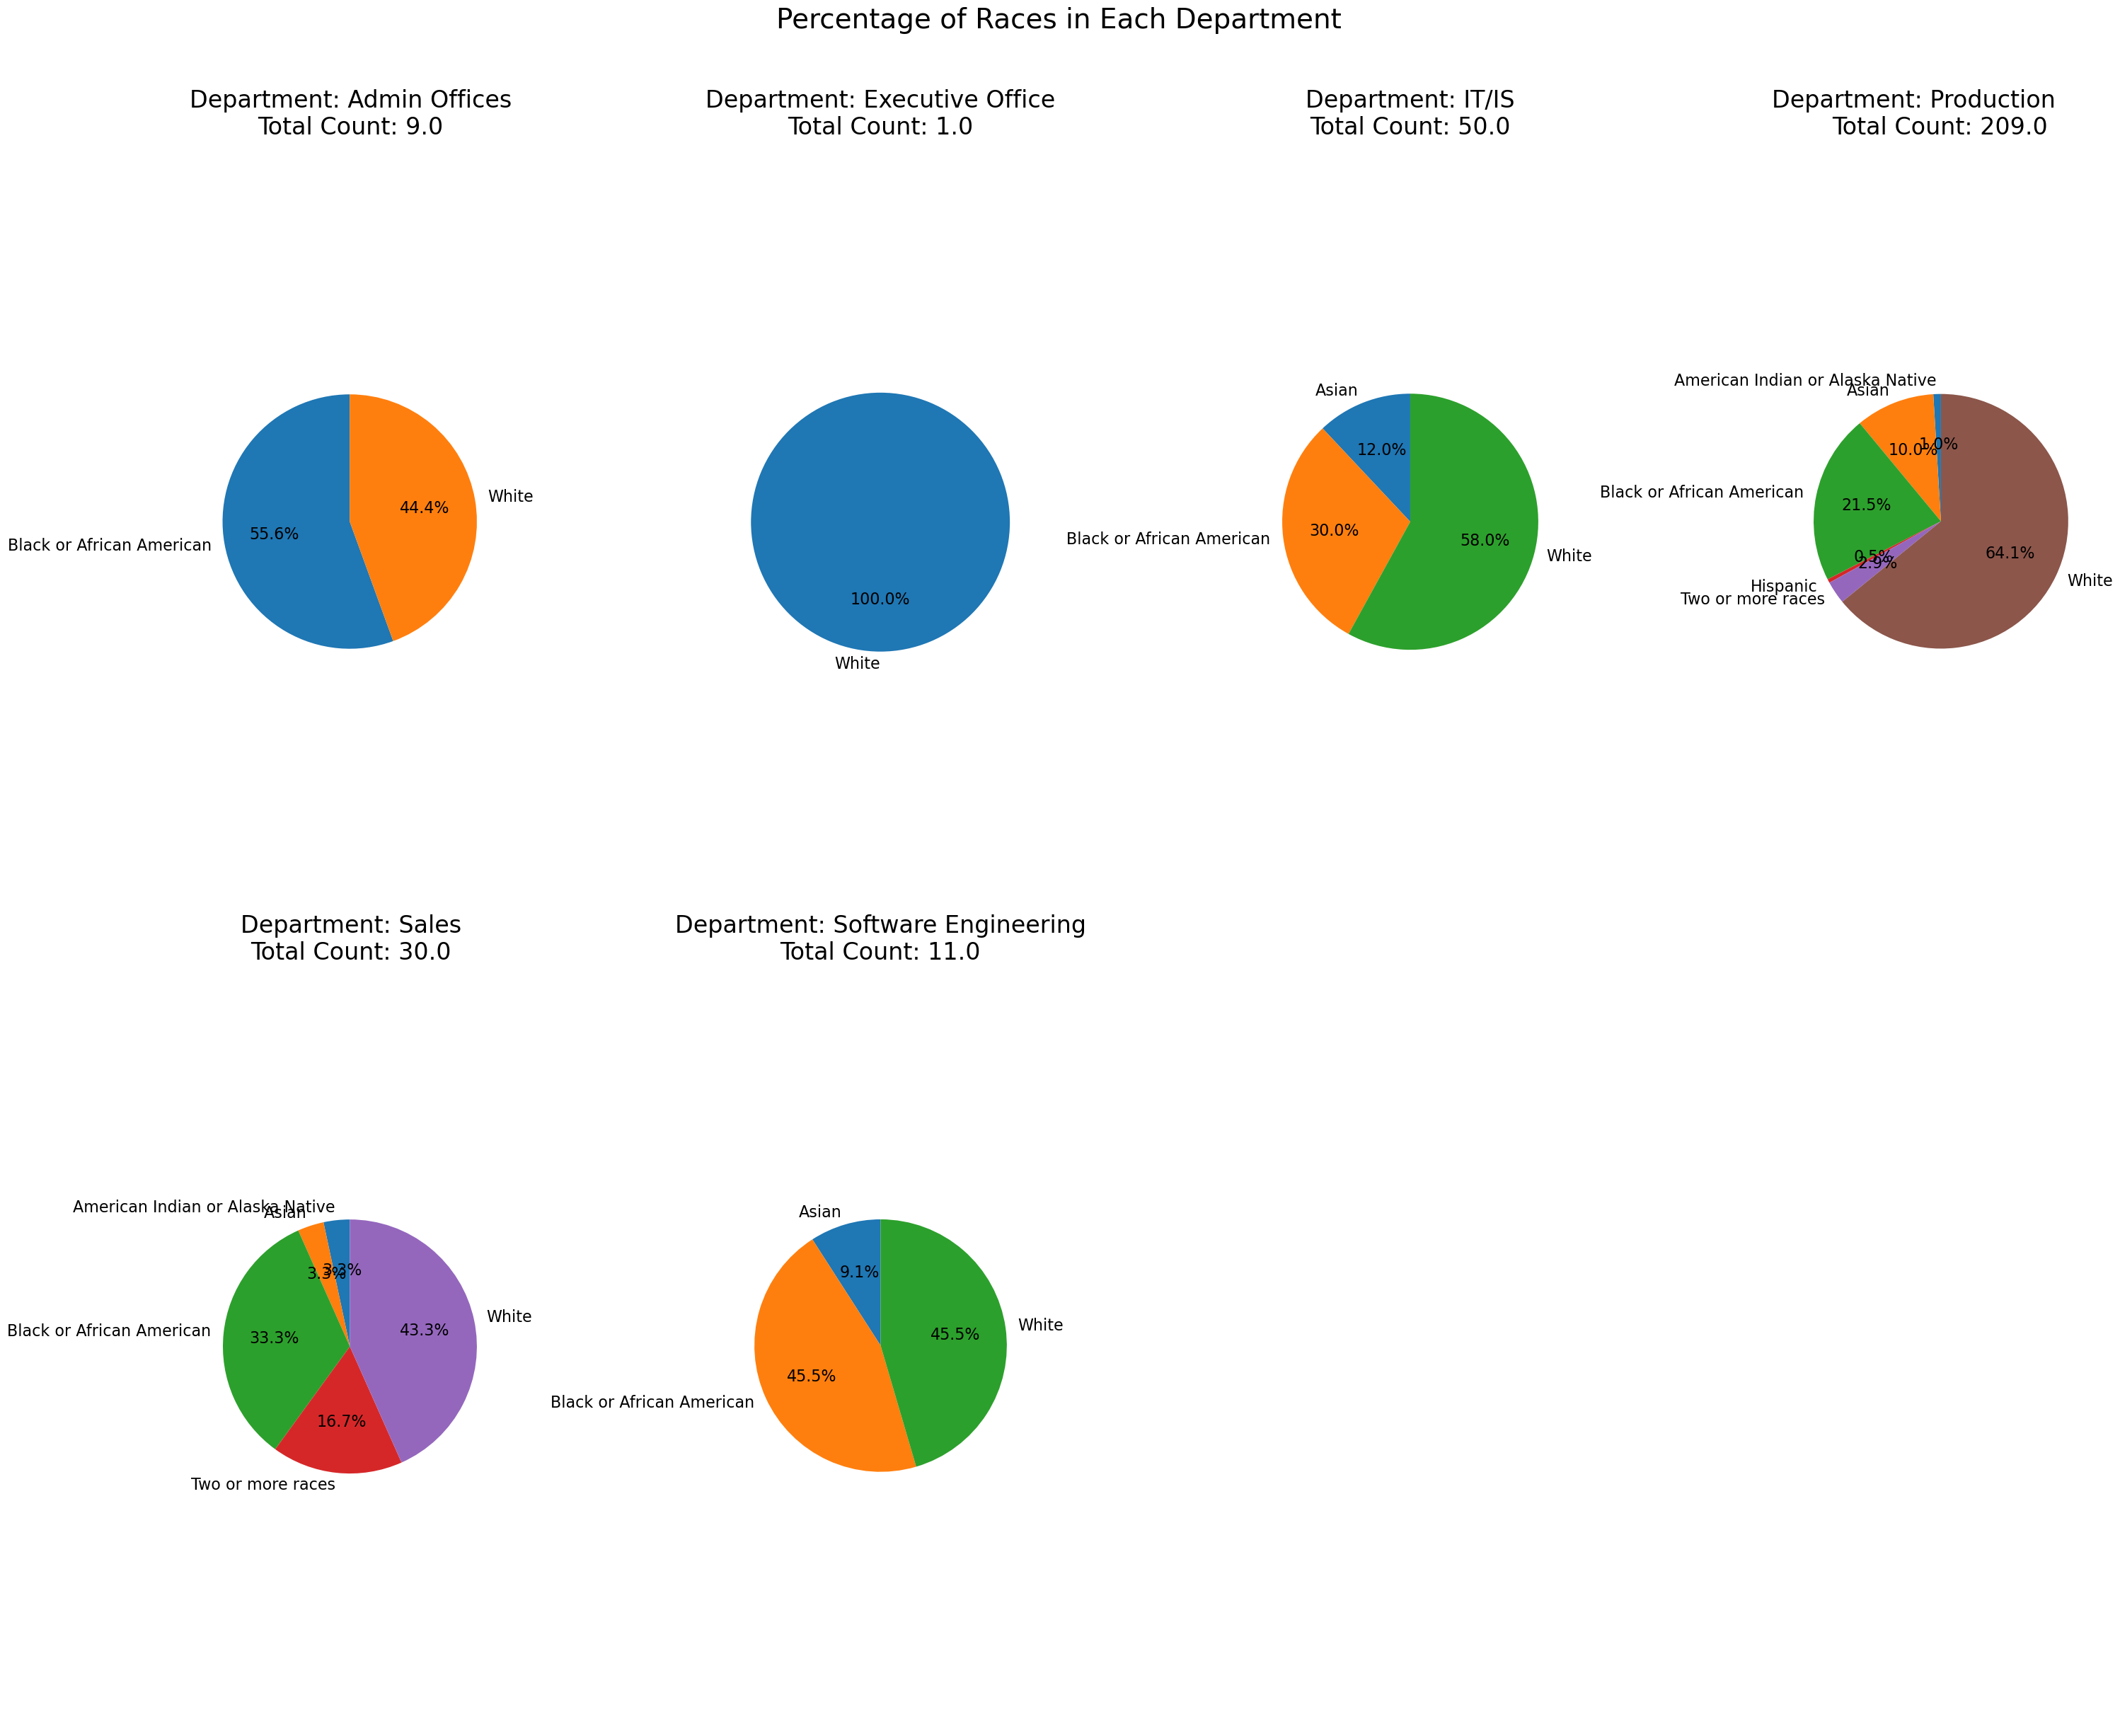

In [2]:
#---------------------------------------------------Section A----------
#Plots of Percentages of every race in each department
#investigating whether some of the reaces are less represented in some departments
import matplotlib.pyplot as plt

department_race_counts = hr_data.groupby(['Department', 'RaceDesc']).size().unstack()


departments = department_race_counts.index

num_departments = len(departments)
num_columns = 4
num_rows = (num_departments + num_columns - 1) // num_columns

fig_width = 30
fig_height = 12 * num_rows
subplot_width = 6
subplot_height = 6 / num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(fig_width, fig_height))

for i, department in enumerate(departments):
    row_idx = i // num_columns
    col_idx = i % num_columns

    race_counts = department_race_counts.loc[department].dropna()
    labels = race_counts.index
    sizes = race_counts.values
    total_count = sizes.sum()

    wedges, texts, autotexts = axes[row_idx, col_idx].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    axes[row_idx, col_idx].set_title(f"Department: {department}\nTotal Count: {total_count}", fontsize=24)
    axes[row_idx, col_idx].axis('equal')
    plt.setp(texts, fontsize=16)
    plt.setp(autotexts, fontsize=16)

if num_departments < num_rows * num_columns:
    for i in range(num_departments, num_rows * num_columns):
        row_idx = i // num_columns
        col_idx = i % num_columns
        fig.delaxes(axes[row_idx, col_idx])

plt.suptitle('Percentage of Races in Each Department', fontsize=28, y=1.02)
plt.tight_layout()
plt.show()

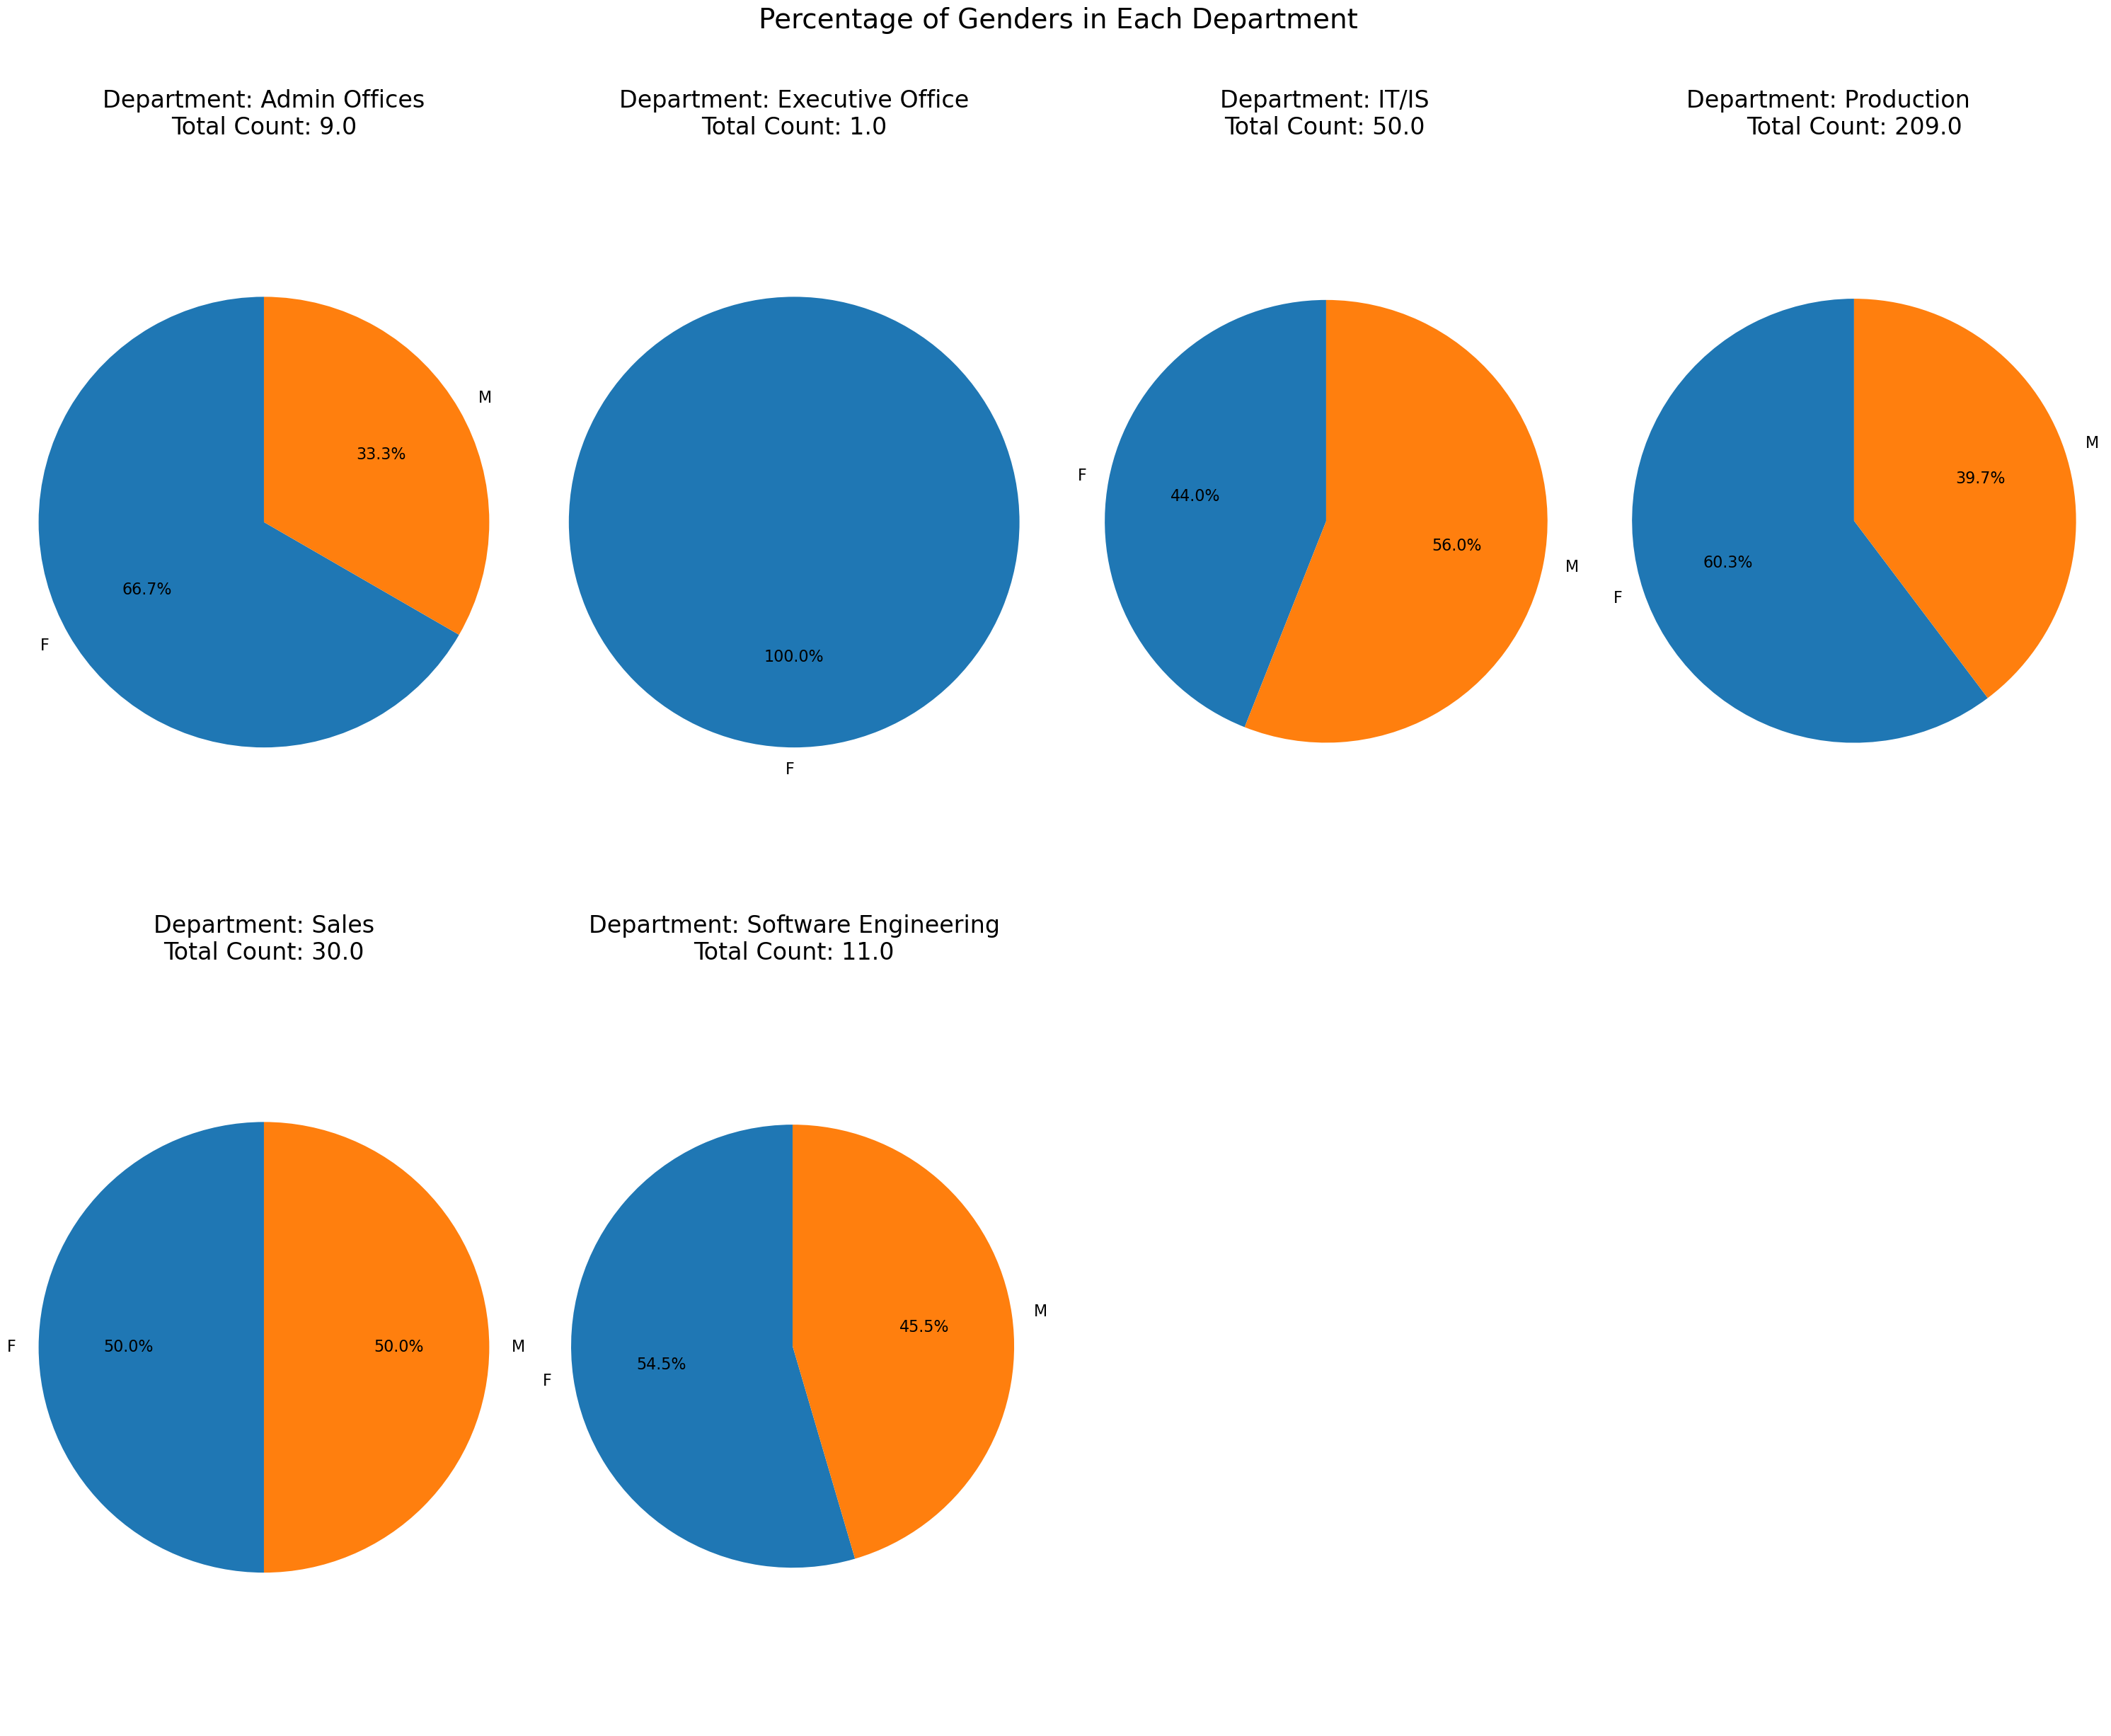

In [3]:
#Percenteges of genders in every department
import matplotlib.pyplot as plt


department_gender_counts = hr_data.groupby(['Department', 'Sex']).size().unstack()

departments = department_gender_counts.index

num_departments = len(departments)
num_columns = 4
num_rows = (num_departments + num_columns - 1) // num_columns

fig_width = 30
fig_height = 12 * num_rows
subplot_width = 6
subplot_height = 6 / num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(fig_width, fig_height))

for i, department in enumerate(departments):
    row_idx = i // num_columns
    col_idx = i % num_columns

    gender_counts = department_gender_counts.loc[department].dropna()
    labels = gender_counts.index
    sizes = gender_counts.values
    total_count = sizes.sum()

    wedges, texts, autotexts = axes[row_idx, col_idx].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    axes[row_idx, col_idx].set_title(f"Department: {department}\nTotal Count: {total_count}", fontsize=24)
    axes[row_idx, col_idx].axis('equal')
    plt.setp(texts, fontsize=16)
    plt.setp(autotexts, fontsize=16)

if num_departments < num_rows * num_columns:
    for i in range(num_departments, num_rows * num_columns):
        row_idx = i // num_columns
        col_idx = i % num_columns
        fig.delaxes(axes[row_idx, col_idx])

plt.suptitle('Percentage of Genders in Each Department', fontsize=28, y=1.02)
plt.tight_layout()
plt.show()


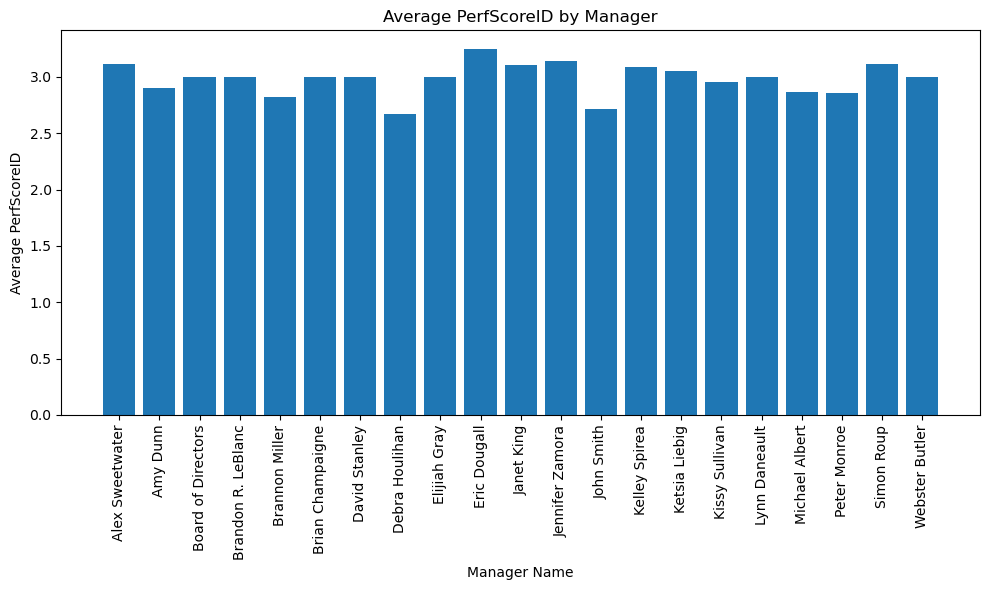

In [4]:
#checking if there are any differences in the performance of employees, seperated by their manager
import pandas as pd
import matplotlib.pyplot as plt



manager_scores = hr_data.groupby('ManagerName')['PerfScoreID'].mean()

plt.figure(figsize=(10, 6)) 
plt.bar(manager_scores.index, manager_scores.values)

plt.xlabel('Manager Name')
plt.ylabel('Average PerfScoreID')
plt.title('Average PerfScoreID by Manager')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

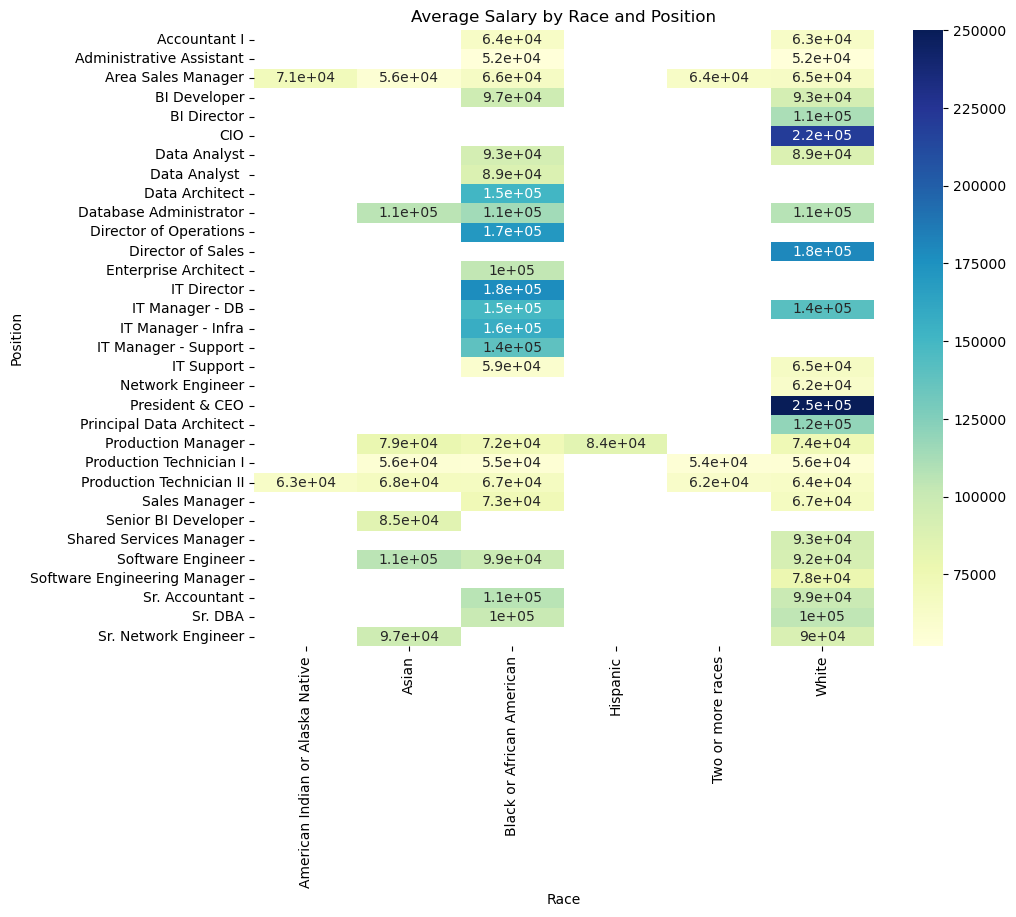

In [5]:
#The plot shows us the differnces of salaries between different positions, but more importatnly, between differnet races for the same position
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
average_salary = hr_data.groupby(['RaceDesc', 'Position'])['Salary'].mean().reset_index()
heatmap_data = average_salary.pivot(index='Position', columns='RaceDesc', values='Salary')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Average Salary by Race and Position')
plt.xlabel('Race')
plt.ylabel('Position')
plt.show()



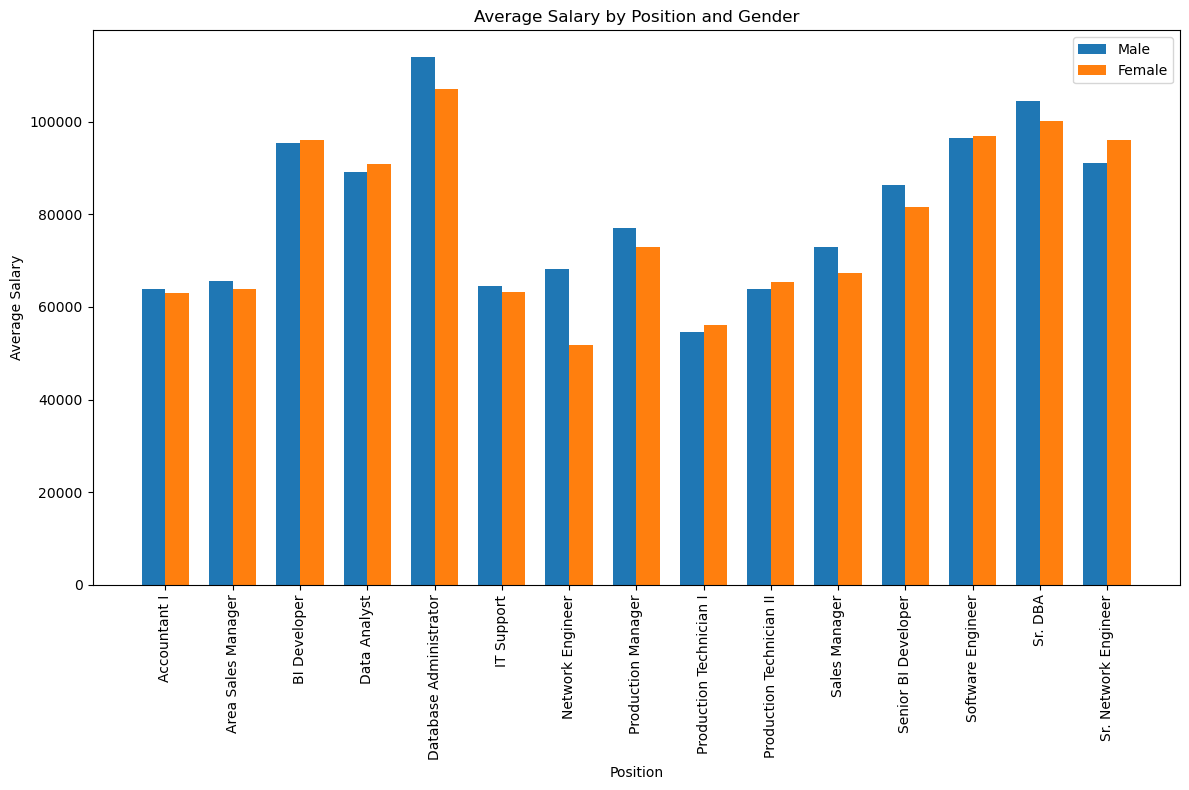

In [6]:
#This plot shows  the differences between salaries of male and female which has the same position 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



male_data = hr_data[hr_data['Sex'] == 'M ']
female_data = hr_data[hr_data['Sex'] == 'F']

male_avg_salary = male_data.groupby('Position')['Salary'].mean()
female_avg_salary = female_data.groupby('Position')['Salary'].mean()

valid_positions = sorted(set(male_avg_salary.index) & set(female_avg_salary.index))

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

x_positions = np.arange(len(valid_positions))

ax.bar(x_positions, male_avg_salary.loc[valid_positions], width=bar_width, label='Male')

ax.bar(x_positions + bar_width, female_avg_salary.loc[valid_positions], width=bar_width, label='Female')

ax.set_xticks(x_positions + bar_width / 2)
ax.set_xticklabels(valid_positions, rotation=90)

ax.set_xlabel('Position')
ax.set_ylabel('Average Salary')
ax.set_title('Average Salary by Position and Gender')

ax.legend()

plt.tight_layout()
plt.show()


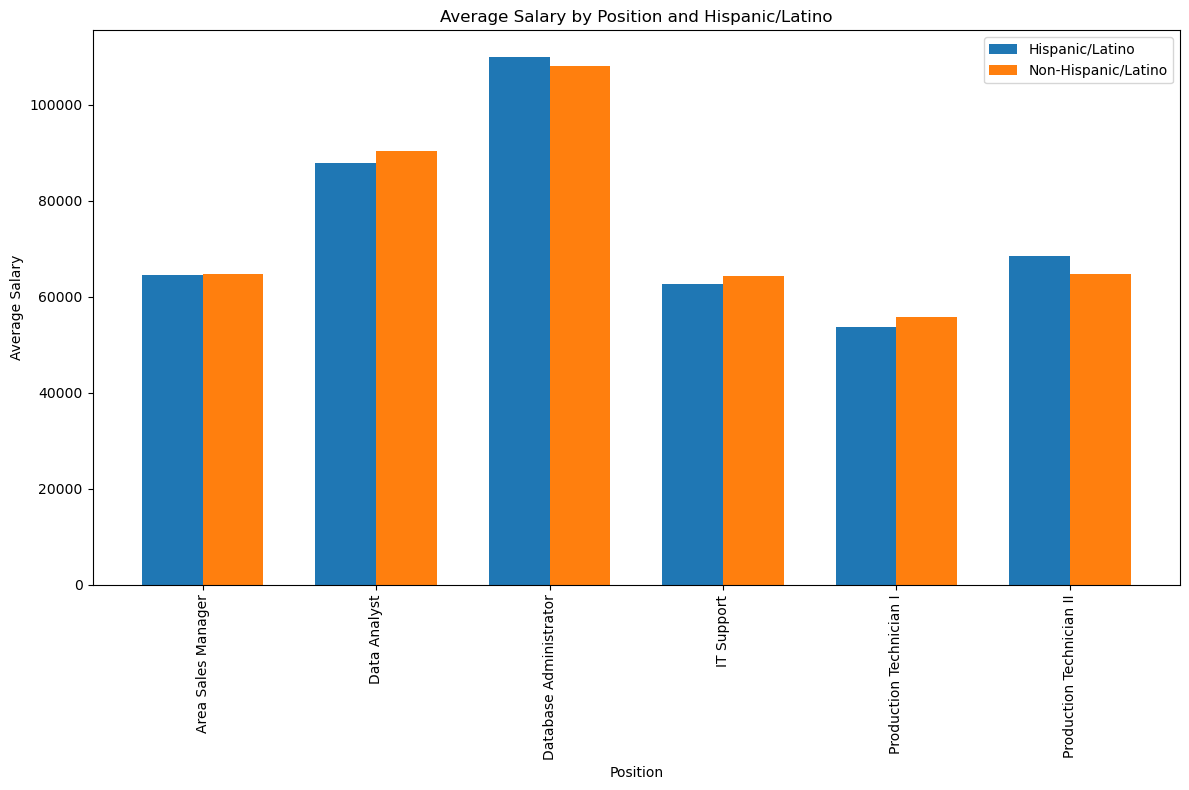

In [7]:
#This plot shows us the differences between salaries of hispanic and non-hispanic which has the same position 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



hispanic_data = hr_data[hr_data['HispanicLatino'] == 'Yes']
non_hispanic_data = hr_data[hr_data['HispanicLatino'] == 'No']

hispanic_avg_salary = hispanic_data.groupby('Position')['Salary'].mean()
non_hispanic_avg_salary = non_hispanic_data.groupby('Position')['Salary'].mean()

valid_positions = sorted(set(hispanic_avg_salary.index) & set(non_hispanic_avg_salary.index))

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

x_positions = np.arange(len(valid_positions))

ax.bar(x_positions, hispanic_avg_salary.loc[valid_positions], width=bar_width, label='Hispanic/Latino')

ax.bar(x_positions + bar_width, non_hispanic_avg_salary.loc[valid_positions], width=bar_width, label='Non-Hispanic/Latino')

ax.set_xticks(x_positions + bar_width / 2)
ax.set_xticklabels(valid_positions, rotation=90)

ax.set_xlabel('Position')
ax.set_ylabel('Average Salary')
ax.set_title('Average Salary by Position and Hispanic/Latino')

ax.legend()

plt.tight_layout()
plt.show()


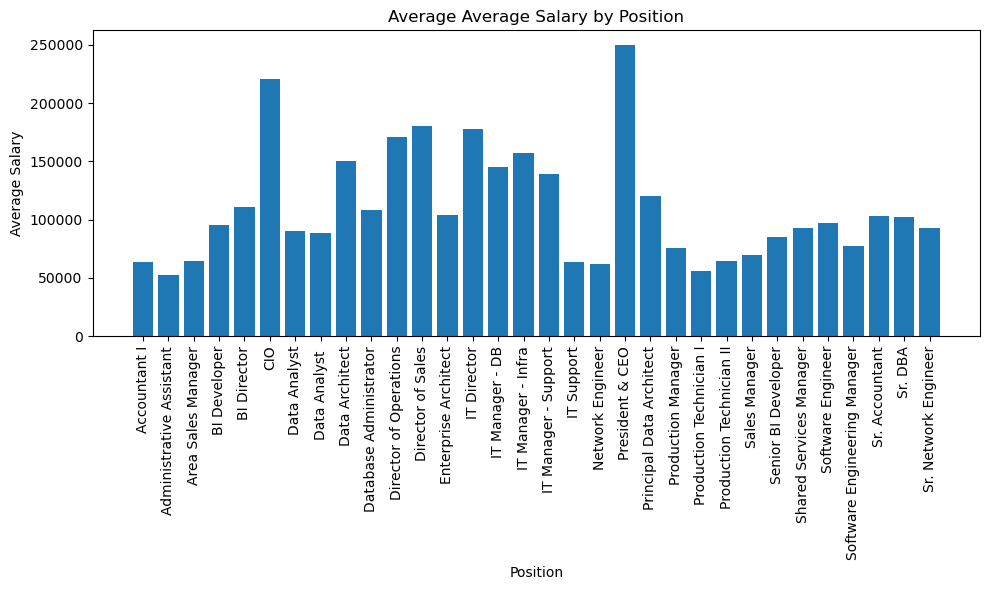

In [8]:
#This plot shows the differences between diffenret position in general
import pandas as pd
import matplotlib.pyplot as plt


manager_scores = hr_data.groupby('Position')['Salary'].mean()

plt.figure(figsize=(10, 6))  
plt.bar(manager_scores.index, manager_scores.values)

plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.title('Average Average Salary by Position')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

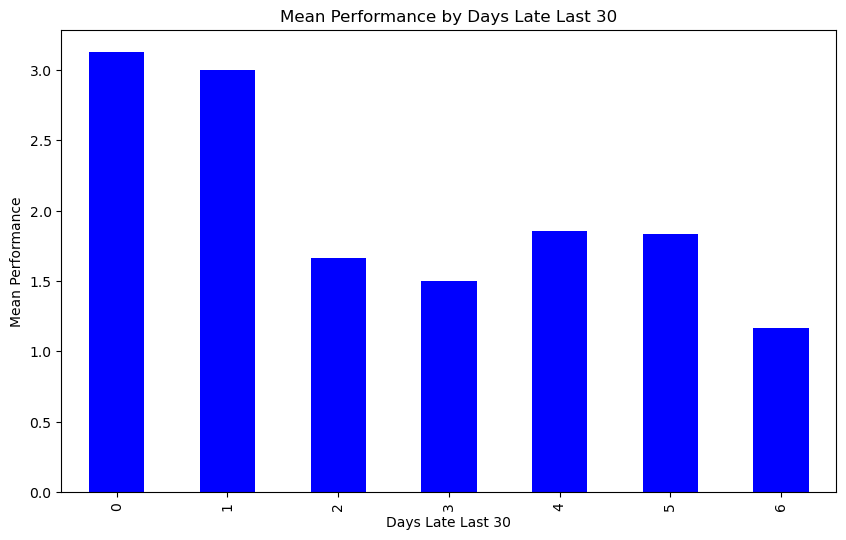

In [9]:
#This plot shows the relationsip between the amount of days an employee was late on and his performance
#We can see that the more an employee is late the less the performance he produces
import matplotlib.pyplot as plt

mean_satisfaction = hr_data.groupby('DaysLateLast30')['PerfScoreID'].mean()

plt.figure(figsize=(10, 6))
mean_satisfaction.plot(kind='bar', color='blue')

plt.xlabel('Days Late Last 30')
plt.ylabel('Mean Performance')
plt.title('Mean Performance by Days Late Last 30')

plt.show()


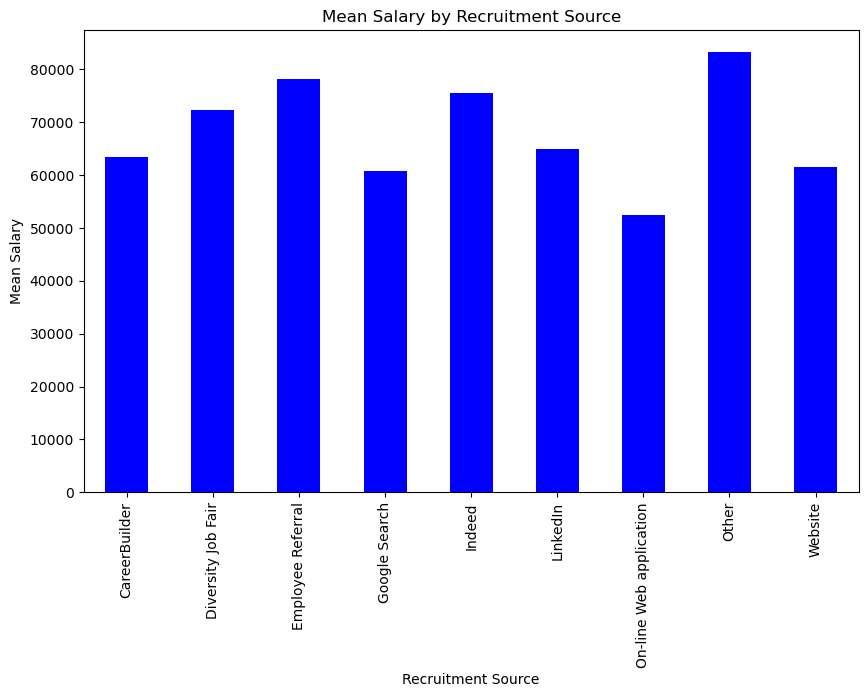

In [10]:
#This plot shows the mean salary of the employees seperated by recrutment sources
import matplotlib.pyplot as plt

mean_satisfaction = hr_data.groupby('RecruitmentSource')['Salary'].mean()

plt.figure(figsize=(10, 6))
mean_satisfaction.plot(kind='bar', color='blue')

plt.xlabel('Recruitment Source')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Recruitment Source')

plt.show()


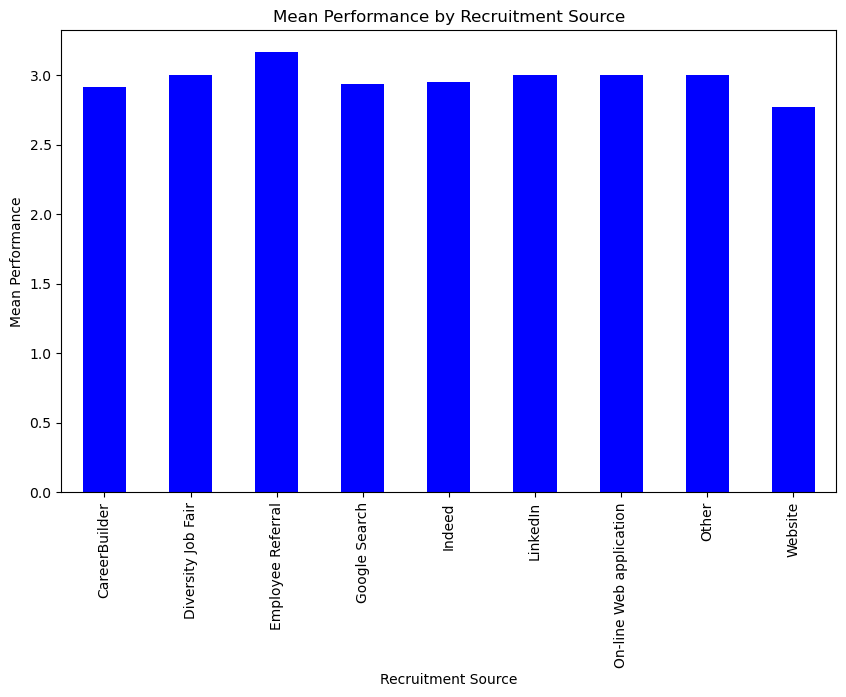

In [11]:
#This plot shows the mean performance of the employees seperated by recrutment sources

import matplotlib.pyplot as plt

mean_satisfaction = hr_data.groupby('RecruitmentSource')['PerfScoreID'].mean()

plt.figure(figsize=(10, 6))
mean_satisfaction.plot(kind='bar', color='blue')

plt.xlabel('Recruitment Source')
plt.ylabel('Mean Performance')
plt.title('Mean Performance by Recruitment Source')

plt.show()

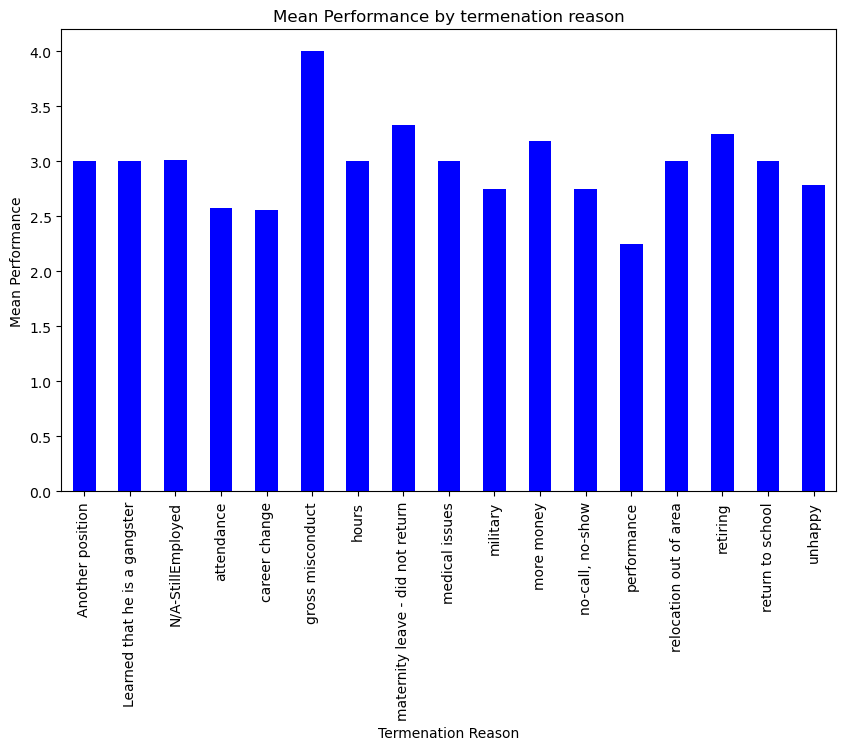

In [12]:
#This plot shows the mean performance of the employees seperated by termination reason

import matplotlib.pyplot as plt

mean_satisfaction = hr_data.groupby('TermReason')['PerfScoreID'].mean()

plt.figure(figsize=(10, 6))
mean_satisfaction.plot(kind='bar', color='blue')

plt.xlabel('Termenation Reason')
plt.ylabel('Mean Performance')
plt.title('Mean Performance by termenation reason')

plt.show()

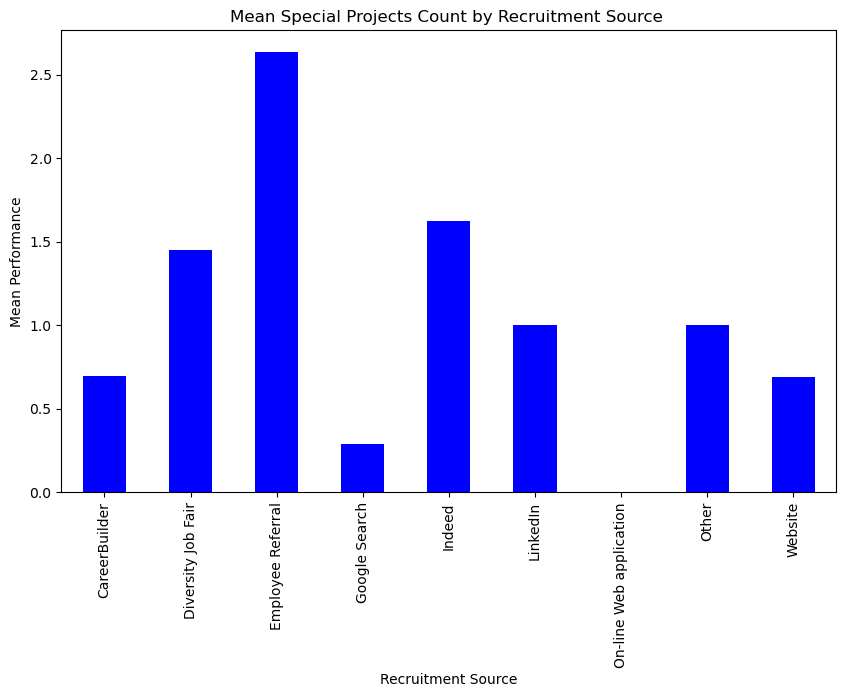

In [13]:
#This plot shows the mean special projects of the employees seperated by recruitment sources

import matplotlib.pyplot as plt

mean_satisfaction = hr_data.groupby('RecruitmentSource')['SpecialProjectsCount'].mean()

plt.figure(figsize=(10, 6))
mean_satisfaction.plot(kind='bar', color='blue')

plt.xlabel('Recruitment Source')
plt.ylabel('Mean Performance')
plt.title('Mean Special Projects Count by Recruitment Source ')

plt.show()

In [14]:
#Data pre proccesing
#------------------------------------------------Section B------------------------
empstatus_array=hr_data['EmploymentStatus'].values
del hr_data['Employee_Name']
del hr_data['EmpID']
del hr_data['MarriedID']
del hr_data['MaritalStatusID']
del hr_data['GenderID']
del hr_data['EmpStatusID']
del hr_data['DeptID']
del hr_data['PerformanceScore']
del hr_data['Termd']
del hr_data['DateofTermination']



In [15]:
del hr_data['PositionID']
del hr_data['HispanicLatino']
del hr_data['ManagerID']
import datetime

hr_data['DOB'] = pd.to_datetime(hr_data['DOB'])  # Convert the column to datetime if it's not already

current_date = datetime.datetime.now()  # Get the current date

hr_data['Age'] = (current_date - hr_data['DOB']) // datetime.timedelta(days=365.25)

hr_data['Age'] = hr_data['Age'].astype(int)


In [16]:
del hr_data['Zip']
del hr_data['DOB']
hr_data.columns


Index(['PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Position', 'State',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'DateofHire',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'Age'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

hr_data['YearofHire'] = pd.to_datetime(hr_data['DateofHire']).dt.year
hr_data['YearofPerReview'] = pd.to_datetime(hr_data['LastPerformanceReview_Date']).dt.year

del hr_data['FromDiversityJobFairID']
del hr_data['DateofHire']
del hr_data['LastPerformanceReview_Date']
columns_to_encode=['Position','State','Sex','MaritalDesc','CitizenDesc','RaceDesc','Department','ManagerName','RecruitmentSource']

encoded_pos  = pd.get_dummies(hr_data['Position'],prefix='position')
encoded_stat  = pd.get_dummies(hr_data['State'],prefix='state')

encoded_Sex  = pd.get_dummies(hr_data['Sex'],prefix='Sex')

encoded_MaritalDesc  = pd.get_dummies(hr_data['MaritalDesc'],prefix='MaritalDesc')

encoded_CitizenDesc  = pd.get_dummies(hr_data['CitizenDesc'],prefix='CitizenDesc')
encoded_RaceDesc  = pd.get_dummies(hr_data['RaceDesc'],prefix='RaceDesc')
encoded_Department  = pd.get_dummies(hr_data['Department'],prefix='Department')
encoded_ManagerName  = pd.get_dummies(hr_data['ManagerName'],prefix='ManagerName')
encoded_RecruitmentSource  = pd.get_dummies(hr_data['RecruitmentSource'],prefix='RecruitmentSource')
combined_encoded_df = pd.concat([encoded_pos, encoded_stat, encoded_Sex, encoded_MaritalDesc,encoded_CitizenDesc,encoded_RaceDesc,encoded_Department,encoded_ManagerName,encoded_RecruitmentSource], axis=1)
hr_data.drop(columns_to_encode, axis=1, inplace=True)

del hr_data['TermReason']
del hr_data['EmploymentStatus']
scaler.fit(hr_data)

df_numeric_scaled = scaler.transform(hr_data)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns=hr_data.columns,index=hr_data.index)
hr_data = pd.concat([df_numeric_scaled, combined_encoded_df], axis=1)


column_names = hr_data.columns.to_numpy()



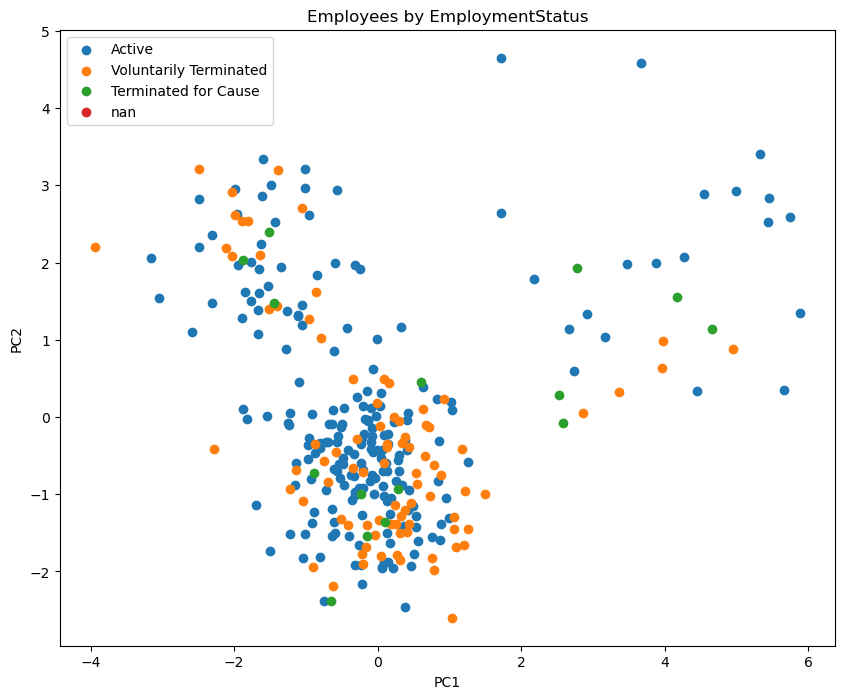

In [18]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


# Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
hr_data_2d = pca.fit_transform(hr_data)

principal_df = pd.DataFrame(data=hr_data_2d, columns=['PC1', 'PC2'])
principal_df['EmploymentStatus'] = hr_data_copy['EmploymentStatus']

plt.figure(figsize=(10, 8))
for status in principal_df['EmploymentStatus'].unique():
    cluster_data = principal_df[principal_df['EmploymentStatus'] == status]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=status)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Employees by EmploymentStatus')
plt.legend()
plt.show()



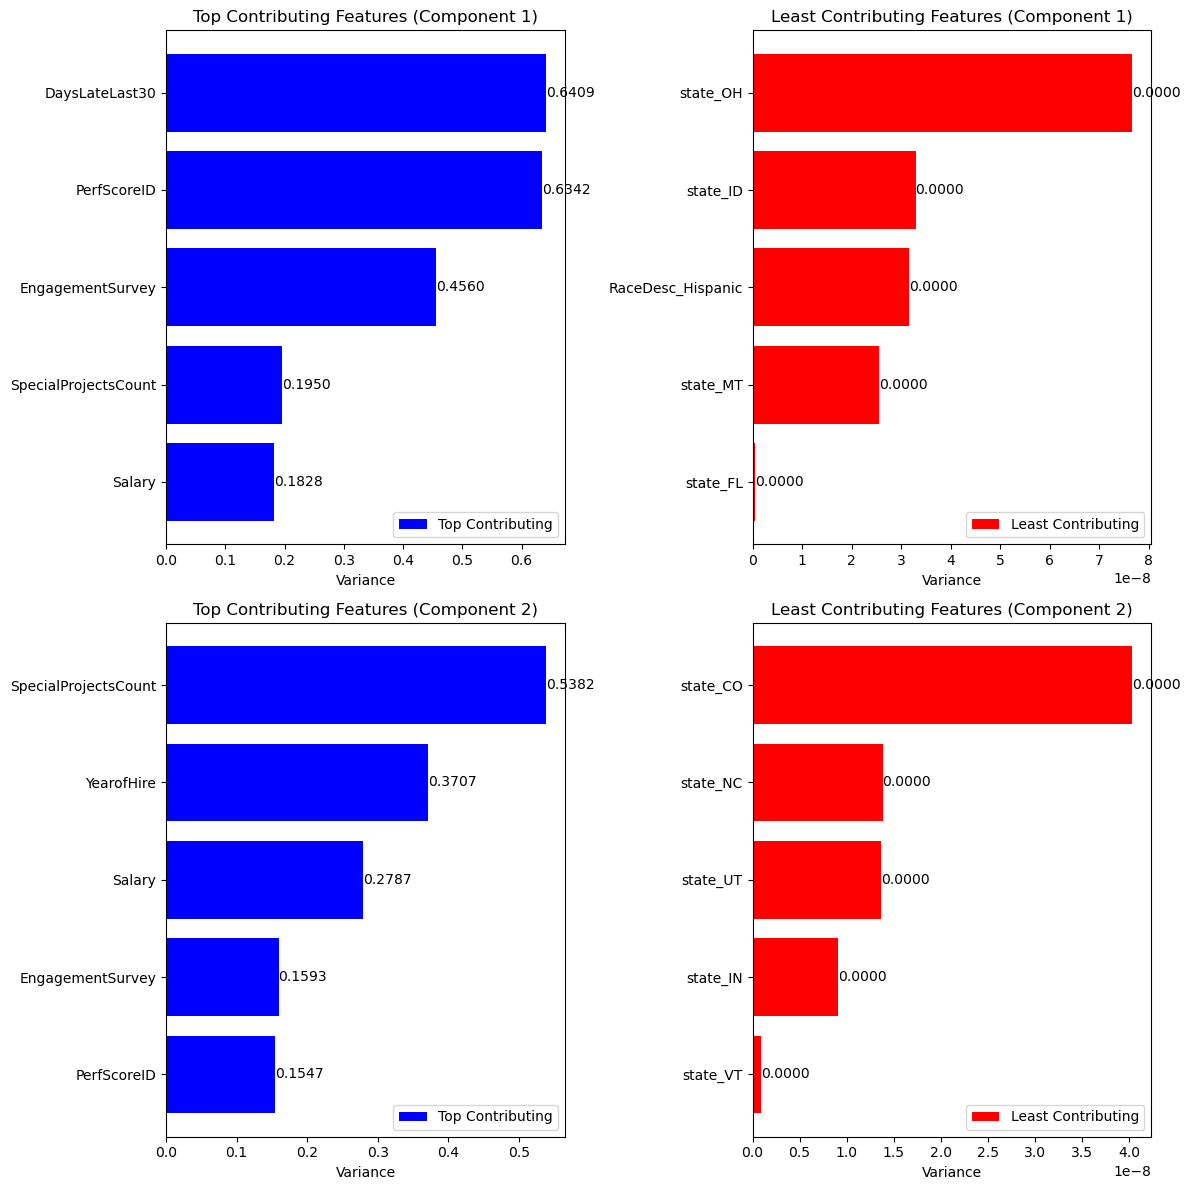

In [19]:

import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_

fig, axs = plt.subplots(nrows=len(pca.components_), ncols=2, figsize=(12, 6 * len(pca.components_)))

for i, component in enumerate(pca.components_):
    component_variances = [(column_names[j], explained_variance[i] * (value ** 2)) for j, value in enumerate(component)]
    component_variances.sort(key=lambda x: x[1], reverse=True)
    top_features = [feature for feature, _ in component_variances[:5]]
    least_features = [feature for feature, _ in component_variances[-5:]]
    
    axs[i, 0].barh(range(len(top_features)), [variance for _, variance in component_variances[:5]], color='blue', label='Top Contributing')
    y_ticks = range(len(top_features))
    axs[i, 0].set_yticks(y_ticks)
    axs[i, 0].set_yticklabels(top_features)
    axs[i, 0].invert_yaxis()
    axs[i, 0].set_xlabel('Variance')
    axs[i, 0].set_title(f'Top Contributing Features (Component {i+1})')
    axs[i, 0].legend(loc='lower right')
    for j, variance in enumerate(component_variances[:5]):
        axs[i, 0].text(variance[1], j, f'{variance[1]:.4f}', ha='left', va='center')
    
    axs[i, 1].barh(range(len(least_features)), [variance for _, variance in component_variances[-5:]], color='red', label='Least Contributing')
    y_ticks = range(len(least_features))
    axs[i, 1].set_yticks(y_ticks)
    axs[i, 1].set_yticklabels(least_features)
    axs[i, 1].invert_yaxis()
    axs[i, 1].set_xlabel('Variance')
    axs[i, 1].set_title(f'Least Contributing Features (Component {i+1})')
    axs[i, 1].legend(loc='lower right')
    for j, variance in enumerate(component_variances[-5:]):
        axs[i, 1].text(variance[1], j, f'{variance[1]:.4f}', ha='left', va='center')

plt.tight_layout()
plt.show()

#According to the graphs we can coclude the features that distinguis the data by EmploymentStatus are features that are related to the employee's performance and engagement

#On the other hand, we can see that features such as the state the employee came from doesn't contribute to the seperation between the employees


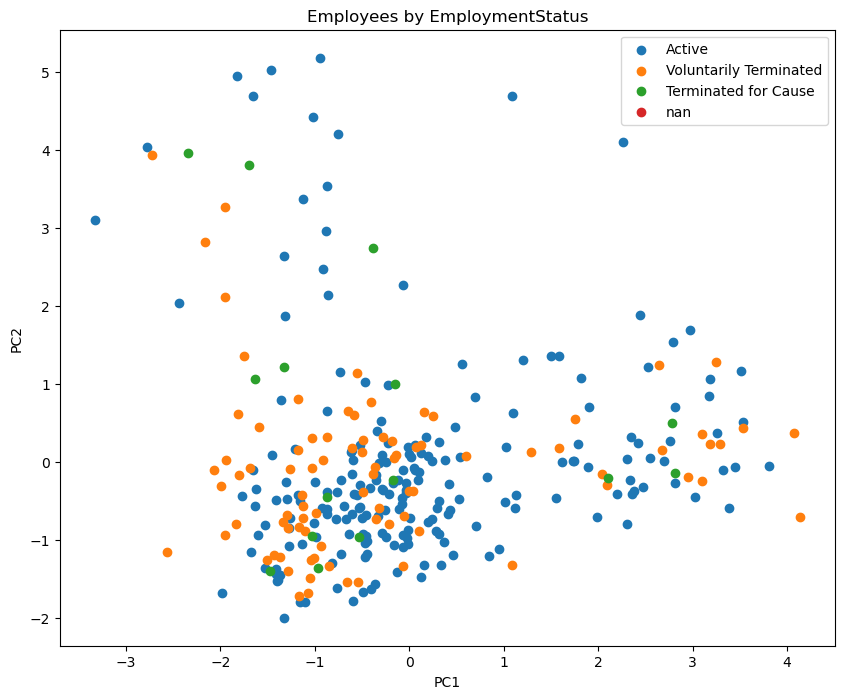

In [20]:
#As we can see, the feature that contribute the most for the seperation is PerfScoreID
#Removing this feature from our data and apply the PCA again.
data_forPCA=hr_data.copy()
del data_forPCA['PerfScoreID']
pca1 = PCA(n_components=2)
without_Perf_2d= pca1.fit_transform(data_forPCA)

principal_df = pd.DataFrame(data=without_Perf_2d, columns=['PC1', 'PC2'])
principal_df['EmploymentStatus'] = hr_data_copy['EmploymentStatus']

plt.figure(figsize=(10, 8))
for status in principal_df['EmploymentStatus'].unique():
    cluster_data = principal_df[principal_df['EmploymentStatus'] == status]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=status)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Employees by EmploymentStatus')
plt.legend()
plt.show()

#In comparsion to the first scatter=plot it's clear that the cohesion of each EmployemntStatus is weaker - means that this result posses a worse quality of clustering.
#The reason behind the differences between the 2 scatter plots is the removing of the most contributing feature.

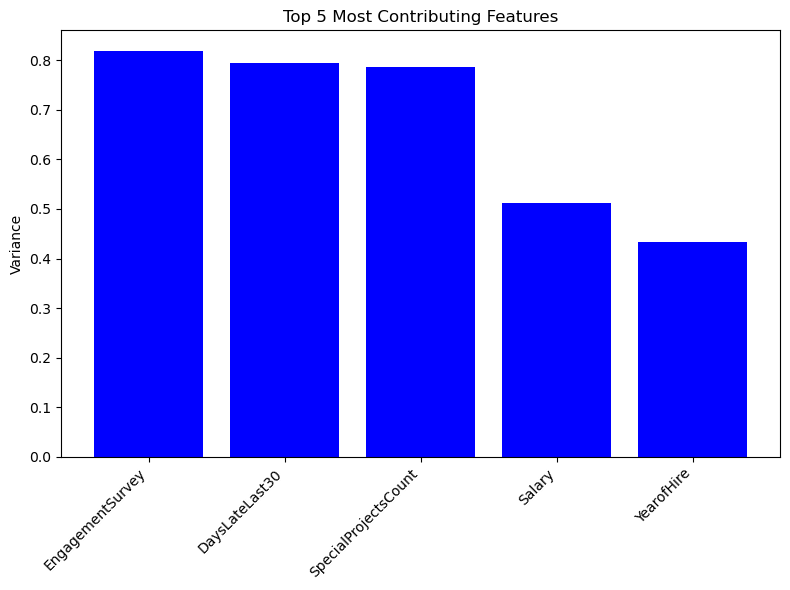

In [21]:
import matplotlib.pyplot as plt
column_names=column_names[column_names!='PerfScoreID']
component_variances = [(column_names[j], explained_variance[i] * (pca1.components_[i][j] ** 2)) for i in range(len(pca1.components_)) for j in range(len(column_names))]

component_variances.sort(key=lambda x: x[1], reverse=True)

top_features = [feature for feature, _ in component_variances[:5]]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(len(top_features)), [variance for _, variance in component_variances[:5]], color='blue')
ax.set_xticks(range(len(top_features)))
ax.set_xticklabels(top_features, rotation=45, ha='right')
ax.set_ylabel('Variance')
ax.set_title('Top 5 Most Contributing Features')
plt.tight_layout()
plt.show()



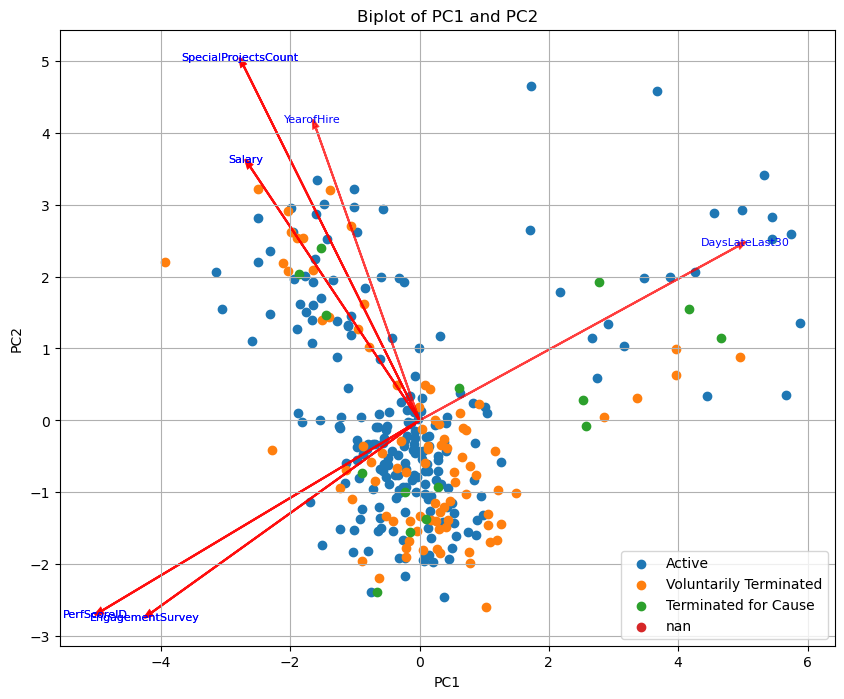

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
hr_data_2d = pca.fit_transform(hr_data)

principal_df = pd.DataFrame(data=hr_data_2d, columns=['PC1', 'PC2'])
principal_df['EmploymentStatus'] = hr_data_copy['EmploymentStatus']

loadings = pca.components_.T  # Transpose for easier indexing

plt.figure(figsize=(10, 8))
for status in principal_df['EmploymentStatus'].unique():
    cluster_data = principal_df[principal_df['EmploymentStatus'] == status]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=status)

top_features = np.abs(loadings).argsort(axis=0)[-5:][::-1]
arrow_scaling_factor = 10  
for i in top_features.flatten():
    x, y = arrow_scaling_factor * loadings[i, :]
    arrow_style = dict(color='r', alpha=0.75, linewidth=1.5, head_width=0.08, length_includes_head=True)
    text_style = dict(color='b', fontsize=8, ha='center', va='center')
    plt.arrow(0, 0, x, y, **arrow_style)
    plt.text(x, y, hr_data.columns[i], **text_style)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

#It can be noticed that there is a correlation between the two metrics PerfScoreID and EngagementSurvey - this is a correlation that shows that in fact employees who feel a greater commitment to the company also have better performance and vice versa.
#Another interesting thing in this context - there is an inverse correlation between these two ratings and DaysLateLast30, meaning that those who were more late in the last month both performed less well and rated their commitment to the company lower.
#There is a certain correlation between YearOfHire and Salary - something that could indicate that new employees are rewarded with a higher salary.
#Another correlation is between the salary and the number of projects - it can be concluded that an employee who is involved in more projects is rewarded for this with his salary.
#It can be seen that employees who were late more days in the last 30 days are also the employees who were fired at higher rates by the company - since we saw that their performance was worse respectively, it can be concluded that the company chose to fire them for a variety of reasons, including low performance.
#(You can see that in the DaysLateLast30 direction there are more green dots)
#Another interesting insight that can be deduced from the graph is that the older the employees (year of starting work is smaller), the higher the percentage of employees who resigned (inverted arrow in relation to the orange dots).
#Similarly, it can be said that people who earn less have also decided to resign - in each of the above cases it is possible that this is a causal relationship rather than a statistical one

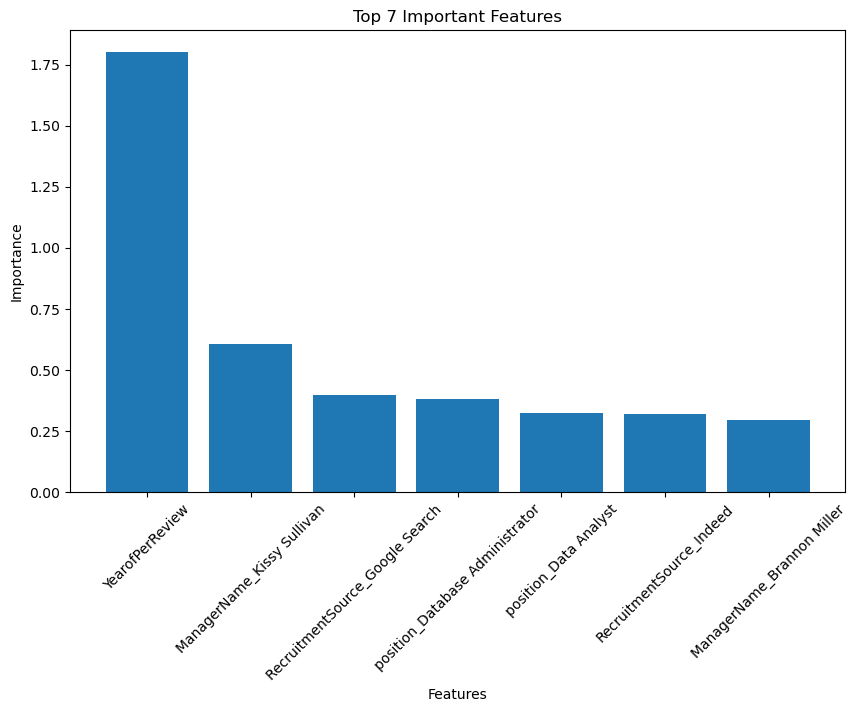

Class: Active
Sensitivity: 0.9903381642512077
Specificity: 0.9514563106796117

Class: Voluntarily Terminated
Sensitivity: 0.875
Specificity: 0.9594594594594594

Class: Terminated for Cause
Sensitivity: 0.4
Specificity: 0.9728813559322034

Average Accuracy: 0.9290322580645162


In [23]:
#----------------------------------------------Section C----------------------------------------
#SVM usage for classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


class_names = ['Active', 'Voluntarily Terminated', 'Terminated for Cause']

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 10]
}

grid_search = GridSearchCV(svm, param_grid, cv=5)

grid_search.fit(hr_data, hr_data_copy['EmploymentStatus'])

best_model = grid_search.best_estimator_

best_model.fit(hr_data, hr_data_copy['EmploymentStatus'])

feature_importances = np.abs(best_model.coef_[0])

sorted_indices = np.argsort(feature_importances)[::-1]

top_7_features = [hr_data.columns[i] for i in sorted_indices[:7]]
top_7_importances = [feature_importances[i] for i in sorted_indices[:7]]

# Showing the top 7 important features
plt.figure(figsize=(10, 6))
plt.bar(top_7_features, top_7_importances)
plt.title('Top 7 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

y_pred = cross_val_predict(best_model, hr_data, hr_data_copy['EmploymentStatus'], cv=5)

cm = confusion_matrix(hr_data_copy['EmploymentStatus'], y_pred, labels=class_names)

# Calculate sensitivity, specificity, and accuracy for each class
num_classes = cm.shape[0]

sensitivity = []
specificity = []
accuracy = []
for i in range(num_classes):
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = cm.sum() - tp - fn - fp

    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

for i, class_name in enumerate(class_names):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print()

average_accuracy = cross_val_score(best_model, hr_data, hr_data_copy['EmploymentStatus'], cv=5).mean()
print("Average Accuracy:", average_accuracy)


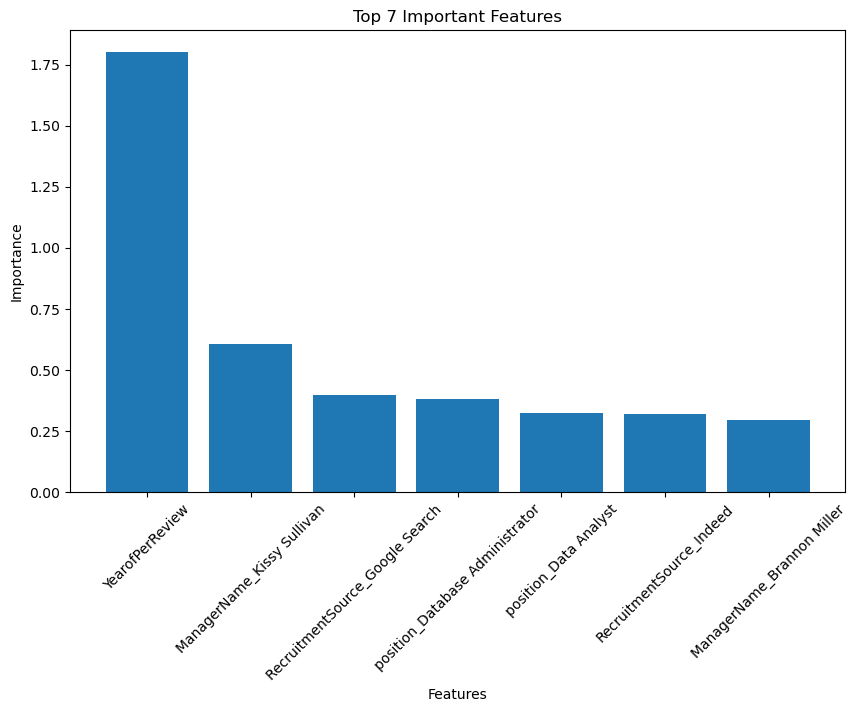

Class: Active
Sensitivity: 1.0
Specificity: 0.9661016949152542

Class: Voluntarily Terminated
Sensitivity: 0.8636363636363636
Specificity: 1.0

Class: Terminated for Cause
Sensitivity: 1.0
Specificity: 0.9932203389830508

Average Accuracy: 0.9161290322580646


In [24]:
#SVM after over-sampling
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt

df = hr_data.join(hr_data_copy['EmploymentStatus'])

active = df[df['EmploymentStatus'] == 'Active']
terminated_voluntary = df[df['EmploymentStatus'] == 'Voluntarily Terminated']
terminated_for_cause = df[df['EmploymentStatus'] == 'Terminated for Cause']


terminated_for_cause_upsampled = resample(terminated_for_cause,
                                         replace=True,  # Sample with replacement
                                         n_samples=len(active),  # Match the number of samples in the majority class
                                         random_state=42)  # Set a random seed for reproducibility

df_upsampled = pd.concat([active, terminated_voluntary, terminated_for_cause_upsampled])

target=df_upsampled['EmploymentStatus']
del df_upsampled['EmploymentStatus']




class_names = ['Active', 'Voluntarily Terminated', 'Terminated for Cause']

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

grid_search = GridSearchCV(svm, param_grid, cv=5)

grid_search.fit(df_upsampled, target)

best_model = grid_search.best_estimator_

best_model.fit(df_upsampled, target)


top_7_features = [df_upsampled.columns[i] for i in sorted_indices[:7]]
top_7_importances = [feature_importances[i] for i in sorted_indices[:7]]

plt.figure(figsize=(10, 6))
plt.bar(top_7_features, top_7_importances)
plt.title('Top 7 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

y_pred = cross_val_predict(best_model, df_upsampled, target, cv=5)

cm = confusion_matrix(target, y_pred, labels=class_names)

num_classes = cm.shape[0]

sensitivity = []
specificity = []
accuracy = []
for i in range(num_classes):
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = cm.sum() - tp - fn - fp

    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

for i, class_name in enumerate(class_names):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print()

average_accuracy = cross_val_score(best_model, hr_data, hr_data_copy['EmploymentStatus'], cv=5).mean()
print("Average Accuracy:", average_accuracy)



#According to the results it's difficult to conclude any relationship between the most importanta features and the label we ar aimming to pridect
#As we can see, oversampling some under-represented classes increases the Sensitivity and Specificity - For example, 'Terminated for cause' sensitivity was 0.4 before the over-smapling and 1 after.


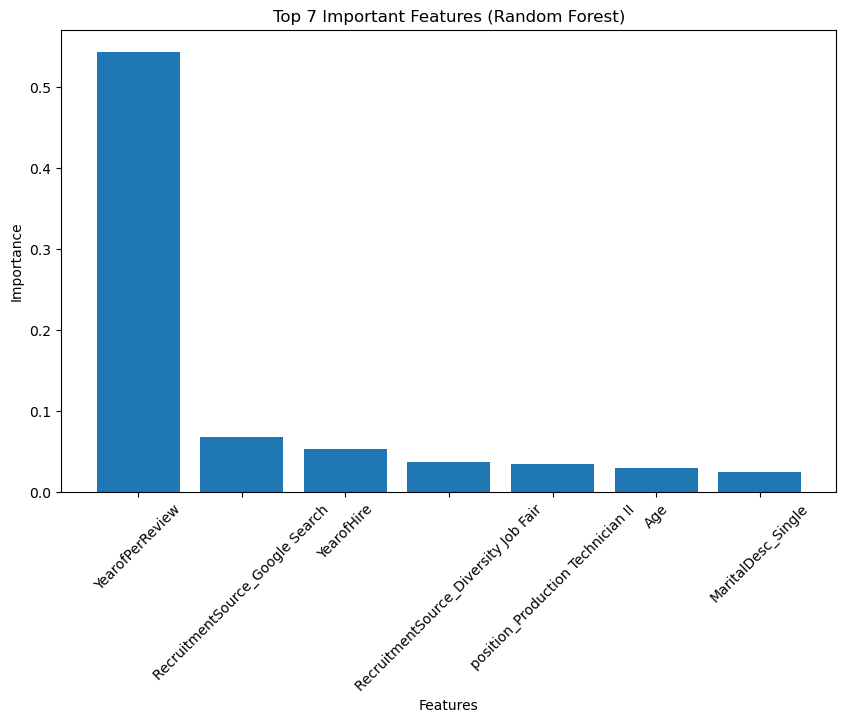

Class: Active
Sensitivity (Random Forest): 1.0
Specificity (Random Forest): 0.8640776699029126

Class: Voluntarily Terminated
Sensitivity (Random Forest): 0.9204545454545454
Specificity (Random Forest): 0.963963963963964

Class: Terminated for Cause
Sensitivity (Random Forest): 0.0
Specificity (Random Forest): 1.0

Average Accuracy (Random Forest): 0.9


In [25]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 20, 30],
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)

grid_search_rf.fit(hr_data, hr_data_copy['EmploymentStatus'])

best_model_rf = grid_search_rf.best_estimator_

best_model_rf.fit(hr_data, hr_data_copy['EmploymentStatus'])

feature_importances_rf = best_model_rf.feature_importances_

sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]

top_7_features_rf = [hr_data.columns[i] for i in sorted_indices_rf[:7]]
top_7_importances_rf = [feature_importances_rf[i] for i in sorted_indices_rf[:7]]

plt.figure(figsize=(10, 6))
plt.bar(top_7_features_rf, top_7_importances_rf)
plt.title('Top 7 Important Features (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

y_pred_rf = cross_val_predict(best_model_rf, hr_data, hr_data_copy['EmploymentStatus'], cv=5)

cm_rf = confusion_matrix(hr_data_copy['EmploymentStatus'], y_pred_rf, labels=class_names)

sensitivity_rf = []
specificity_rf = []
accuracy_rf = []
for i in range(num_classes):
    tp = cm_rf[i, i]
    fn = sum(cm_rf[i, :]) - tp
    fp = sum(cm_rf[:, i]) - tp
    tn = cm_rf.sum() - tp - fn - fp

    sensitivity_rf.append(tp / (tp + fn))
    specificity_rf.append(tn / (tn + fp))

for i, class_name in enumerate(class_names):
    print("Class:", class_name)
    print("Sensitivity (Random Forest):", sensitivity_rf[i])
    print("Specificity (Random Forest):", specificity_rf[i])
    print()

average_accuracy_rf = cross_val_score(best_model_rf, hr_data, hr_data_copy['EmploymentStatus'], cv=5).mean()
print("Average Accuracy (Random Forest):", average_accuracy_rf)


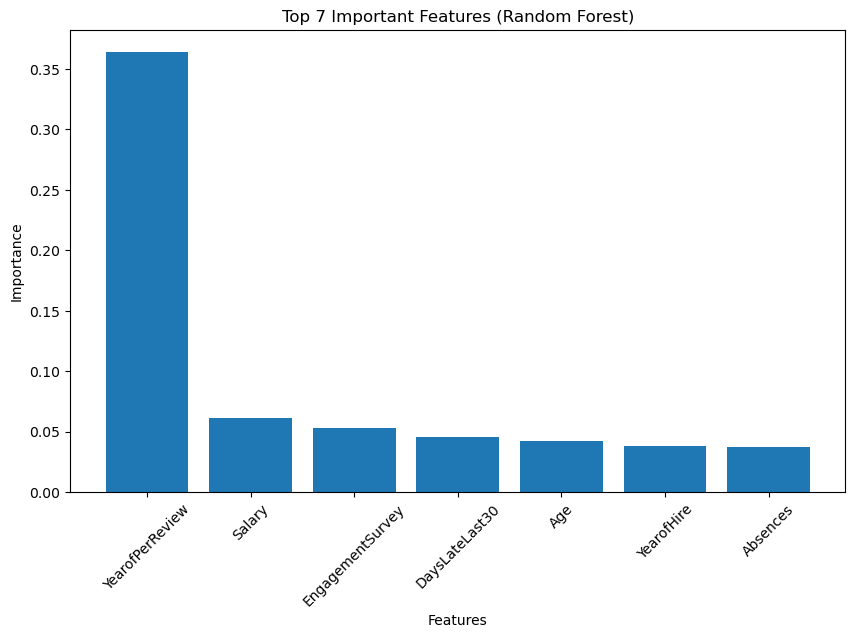

Class: Active
Sensitivity (Random Forest): 0.9951690821256038
Specificity (Random Forest): 0.9661016949152542

Class: Voluntarily Terminated
Sensitivity (Random Forest): 0.8295454545454546
Specificity (Random Forest): 1.0

Class: Terminated for Cause
Sensitivity (Random Forest): 1.0
Specificity (Random Forest): 0.9796610169491525

Average Accuracy (Random Forest): 0.976059405940594


In [26]:
#Random forest after over-sampling
import pandas as pd
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


df = hr_data.join(hr_data_copy['EmploymentStatus'])

active = df[df['EmploymentStatus'] == 'Active']
terminated_voluntary = df[df['EmploymentStatus'] == 'Voluntarily Terminated']
terminated_for_cause = df[df['EmploymentStatus'] == 'Terminated for Cause']


terminated_for_cause_upsampled = resample(terminated_for_cause,
                                         replace=True,  # Sample with replacement
                                         n_samples=len(active),  # Match the number of samples in the majority class
                                         random_state=42)  # Set a random seed for reproducibility

df_upsampled = pd.concat([active, terminated_voluntary, terminated_for_cause_upsampled])

target=df_upsampled['EmploymentStatus']
del df_upsampled['EmploymentStatus']

rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 20, 30],
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)

grid_search_rf.fit(df_upsampled, target)

best_model_rf = grid_search_rf.best_estimator_

best_model_rf.fit(df_upsampled, target)

feature_importances_rf = best_model_rf.feature_importances_

sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]

top_7_features_rf = [df_upsampled.columns[i] for i in sorted_indices_rf[:7]]
top_7_importances_rf = [feature_importances_rf[i] for i in sorted_indices_rf[:7]]

plt.figure(figsize=(10, 6))
plt.bar(top_7_features_rf, top_7_importances_rf)
plt.title('Top 7 Important Features (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

y_pred_rf = cross_val_predict(best_model_rf, df_upsampled, target, cv=5)

cm_rf = confusion_matrix(target, y_pred_rf, labels=class_names)

sensitivity_rf = []
specificity_rf = []
accuracy_rf = []
for i in range(num_classes):
    tp = cm_rf[i, i]
    fn = sum(cm_rf[i, :]) - tp
    fp = sum(cm_rf[:, i]) - tp
    tn = cm_rf.sum() - tp - fn - fp

    sensitivity_rf.append(tp / (tp + fn))
    specificity_rf.append(tn / (tn + fp))

# Print the results for each class for Random Forest
for i, class_name in enumerate(class_names):
    print("Class:", class_name)
    print("Sensitivity (Random Forest):", sensitivity_rf[i])
    print("Specificity (Random Forest):", specificity_rf[i])
    print()

average_accuracy_rf = cross_val_score(best_model_rf, df_upsampled, target, cv=5).mean()
print("Average Accuracy (Random Forest):", average_accuracy_rf)

#As we can see in the results the features that contributed the most for the prediction reflects the employee's preformance.
#For example - the amount of absences and days the employee was late on, impacted the classification. There might be an oppisite relantion ship between the performance of an employee and the 'Terminated by cause' class.
#Besides of features that reflects the employee's performance, there are features such as age that might point the relationship between age and the probability to volantirly terminate
#As we can see, oversampling some under-represented classes increases the Sensitivity and Specificity - For example, 'Terminated for cause' sensitivity was 0.0 before the over-smapling and 1 after.
#In general the accuracy increased as well from 0.87 to 0.97


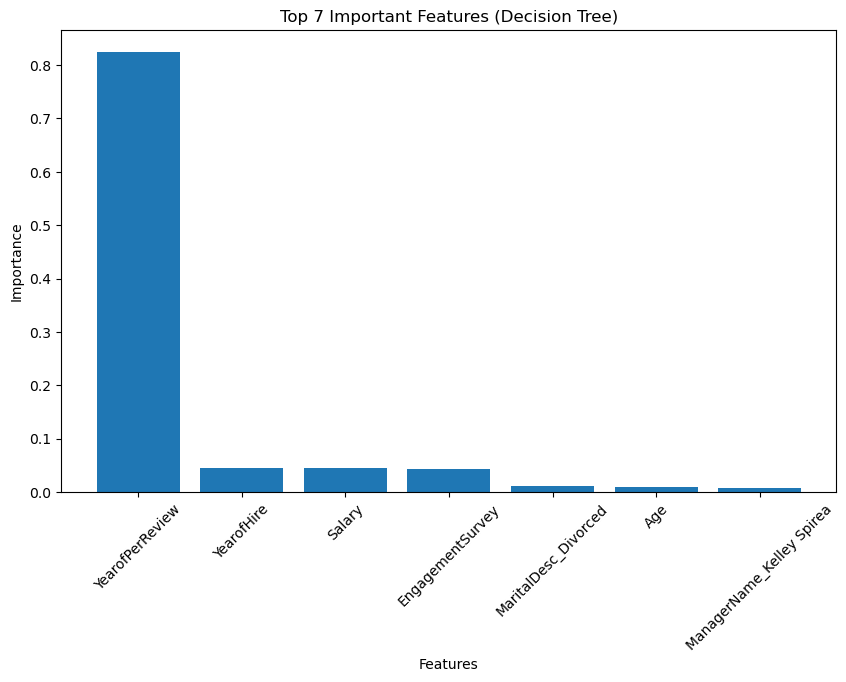

Class: Active
Sensitivity (Decision Tree): 1.0
Specificity (Decision Tree): 1.0

Class: Voluntarily Terminated
Sensitivity (Decision Tree): 0.8863636363636364
Specificity (Decision Tree): 0.963963963963964

Class: Terminated for Cause
Sensitivity (Decision Tree): 0.4666666666666667
Specificity (Decision Tree): 0.9661016949152542

Average Accuracy (Decision Tree): 0.9419354838709678


In [27]:
#Decision Tree classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Active', 'Voluntarily Terminated', 'Terminated for Cause']

dt = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)

grid_search_dt.fit(hr_data, hr_data_copy['EmploymentStatus'])

best_model_dt = grid_search_dt.best_estimator_

best_model_dt.fit(hr_data, hr_data_copy['EmploymentStatus'])

feature_importances_dt = best_model_dt.feature_importances_

sorted_indices_dt = np.argsort(feature_importances_dt)[::-1]

top_7_features_dt = [hr_data.columns[i] for i in sorted_indices_dt[:7]]
top_7_importances_dt = [feature_importances_dt[i] for i in sorted_indices_dt[:7]]

plt.figure(figsize=(10, 6))
plt.bar(top_7_features_dt, top_7_importances_dt)
plt.title('Top 7 Important Features (Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

y_pred_dt = cross_val_predict(best_model_dt, hr_data, hr_data_copy['EmploymentStatus'], cv=5)

cm_dt = confusion_matrix(hr_data_copy['EmploymentStatus'], y_pred_dt, labels=class_names)

sensitivity_dt = []
specificity_dt = []
accuracy_dt = []
for i in range(num_classes):
    tp = cm_dt[i, i]
    fn = sum(cm_dt[i, :]) - tp
    fp = sum(cm_dt[:, i]) - tp
    tn = cm_dt.sum() - tp - fn - fp

    sensitivity_dt.append(tp / (tp + fn))
    specificity_dt.append(tn / (tn + fp))

for i, class_name in enumerate(class_names):
    print("Class:", class_name)
    print("Sensitivity (Decision Tree):", sensitivity_dt[i])
    print("Specificity (Decision Tree):", specificity_dt[i])
    print()

average_accuracy_dt = cross_val_score(best_model_dt, hr_data, hr_data_copy['EmploymentStatus'], cv=5).mean()
print("Average Accuracy (Decision Tree):", average_accuracy_dt)


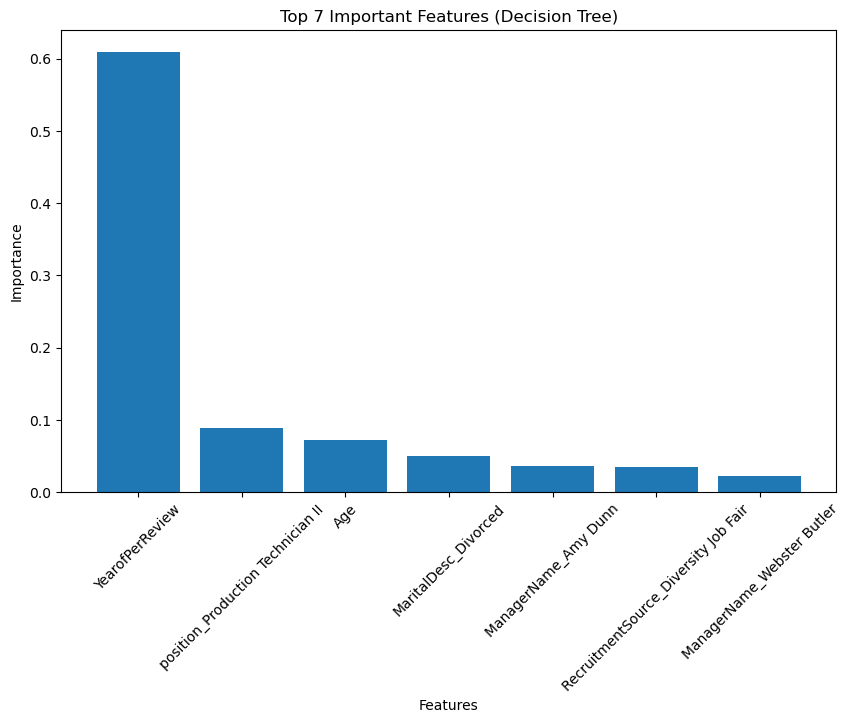

Class: Active
Sensitivity (Decision Tree): 1.0
Specificity (Decision Tree): 1.0

Class: Voluntarily Terminated
Sensitivity (Decision Tree): 0.8636363636363636
Specificity (Decision Tree): 1.0

Class: Terminated for Cause
Sensitivity (Decision Tree): 1.0
Specificity (Decision Tree): 0.9593220338983051

Average Accuracy (Decision Tree): 0.976118811881188


In [28]:
#Decision tree after over-sampling
import pandas as pd
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt


df = hr_data.join(hr_data_copy['EmploymentStatus'])

active = df[df['EmploymentStatus'] == 'Active']
terminated_voluntary = df[df['EmploymentStatus'] == 'Voluntarily Terminated']
terminated_for_cause = df[df['EmploymentStatus'] == 'Terminated for Cause']


terminated_for_cause_upsampled = resample(terminated_for_cause,
                                         replace=True,  # Sample with replacement
                                         n_samples=len(active),  # Match the number of samples in the majority class
                                         random_state=42)  # Set a random seed for reproducibility

df_upsampled = pd.concat([active, terminated_voluntary, terminated_for_cause_upsampled])

target=df_upsampled['EmploymentStatus']
del df_upsampled['EmploymentStatus']

class_names = ['Active', 'Voluntarily Terminated', 'Terminated for Cause']

dt = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)

grid_search_dt.fit(df_upsampled, target)

best_model_dt = grid_search_dt.best_estimator_

best_model_dt.fit(df_upsampled, target)

feature_importances_dt = best_model_dt.feature_importances_

sorted_indices_dt = np.argsort(feature_importances_dt)[::-1]

top_7_features_dt = [df_upsampled.columns[i] for i in sorted_indices_dt[:7]]
top_7_importances_dt = [feature_importances_dt[i] for i in sorted_indices_dt[:7]]

plt.figure(figsize=(10, 6))
plt.bar(top_7_features_dt, top_7_importances_dt)
plt.title('Top 7 Important Features (Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

y_pred_dt = cross_val_predict(best_model_dt, df_upsampled, target, cv=5)

cm_dt = confusion_matrix(target, y_pred_dt, labels=class_names)

sensitivity_dt = []
specificity_dt = []
accuracy_dt = []
for i in range(num_classes):
    tp = cm_dt[i, i]
    fn = sum(cm_dt[i, :]) - tp
    fp = sum(cm_dt[:, i]) - tp
    tn = cm_dt.sum() - tp - fn - fp

    sensitivity_dt.append(tp / (tp + fn))
    specificity_dt.append(tn / (tn + fp))

for i, class_name in enumerate(class_names):
    print("Class:", class_name)
    print("Sensitivity (Decision Tree):", sensitivity_dt[i])
    print("Specificity (Decision Tree):", specificity_dt[i])
    print()

average_accuracy_dt = cross_val_score(best_model_dt, df_upsampled, target, cv=5).mean()
print("Average Accuracy (Decision Tree):", average_accuracy_dt)

#We can see that some of the features reoccure between different models such as age and salary that were discribed earlier in the code.
#As we can see, oversampling some under-represented classes increases the Sensitivity and Specificity - For example, 'Terminated for cause' sensitivity was 0.4 before the over-smapling and 1 after.
#In general the accuracy increased as well from 0.94 to 0.97

In [29]:
hr_data_regression=hr_data_copy.copy()

In [30]:
#------------------------------------------Section D--------------------------
employment_status = hr_data_regression['EmploymentStatus']

hr_data_regression['DateofTermination'] = pd.to_datetime(hr_data_regression['DateofTermination'])
hr_data_regression['LastPerformanceReview_Date'] = pd.to_datetime(hr_data_regression['LastPerformanceReview_Date'])



hr_data_regression['DateofHire'] = pd.to_datetime(hr_data_regression['DateofHire'])



date_of_determination = hr_data_regression['DateofTermination']
del hr_data_regression['DateofTermination']



hr_data_regression['ordinal_perf_date'] = pd.to_datetime(hr_data_regression['LastPerformanceReview_Date']).apply(lambda x: x.toordinal())
del hr_data_regression['Employee_Name']
del hr_data_regression['EmpID']
del hr_data_regression['MarriedID']
del hr_data_regression['MaritalStatusID']
del hr_data_regression['GenderID']
del hr_data_regression['EmpStatusID']
del hr_data_regression['DeptID']
del hr_data_regression['PerformanceScore']
del hr_data_regression['Termd']
del hr_data_regression['PositionID']
del hr_data_regression['HispanicLatino']
del hr_data_regression['ManagerID']
del hr_data_regression['FromDiversityJobFairID']
hr_data_regression['ordinal_hire_date'] = pd.to_datetime(hr_data_regression['DateofHire']).apply(lambda x: x.toordinal())
del hr_data_regression['TermReason']
del hr_data_regression['EmploymentStatus']




In [31]:

del hr_data_regression['DateofHire']
del hr_data_regression['Zip']
del hr_data_regression['DOB']



def transform_data(df):
    columns_to_encode=['Position','State','Sex','MaritalDesc','CitizenDesc','RaceDesc','Department','ManagerName','RecruitmentSource']

    encoded_pos  = pd.get_dummies(df['Position'],prefix='position')
    encoded_stat  = pd.get_dummies(df['State'],prefix='state')

    encoded_Sex  = pd.get_dummies(df['Sex'],prefix='Sex')

    encoded_MaritalDesc  = pd.get_dummies(df['MaritalDesc'],prefix='MaritalDesc')

    encoded_CitizenDesc  = pd.get_dummies(df['CitizenDesc'],prefix='CitizenDesc')
    encoded_RaceDesc  = pd.get_dummies(df['RaceDesc'],prefix='RaceDesc')
    encoded_Department  = pd.get_dummies(df['Department'],prefix='Department')
    encoded_ManagerName  = pd.get_dummies(df['ManagerName'],prefix='ManagerName')
    encoded_RecruitmentSource  = pd.get_dummies(df['RecruitmentSource'],prefix='RecruitmentSource')
    combined_encoded_df = pd.concat([encoded_pos, encoded_stat, encoded_Sex, encoded_MaritalDesc,encoded_CitizenDesc,encoded_RaceDesc,encoded_Department,encoded_ManagerName,encoded_RecruitmentSource], axis=1)
    df.drop(columns_to_encode, axis=1, inplace=True)

   
    return df,combined_encoded_df

    

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hr_data_regression,combined_encoded_df=transform_data(hr_data_regression)
hr_data_regression['EmploymentStatus'] = employment_status
combined_encoded_df['EmploymentStatus']=employment_status

hr_data_regression['DateofTermination'] = date_of_determination
active_reg=hr_data_regression[hr_data_regression['EmploymentStatus']=='Active']

terminated_hr_data_regression = hr_data_regression[(hr_data_regression['EmploymentStatus'] == 'Voluntarily Terminated') |
                                                  (hr_data_regression['EmploymentStatus'] == 'Terminated for Cause')]

terminated_hr_data_regression['DateDiff'] = (terminated_hr_data_regression['DateofTermination'] - terminated_hr_data_regression['LastPerformanceReview_Date']).dt.days
terminated_regression_target=terminated_hr_data_regression['DateDiff']
del terminated_hr_data_regression['EmploymentStatus']
del terminated_hr_data_regression['DateofTermination']
del terminated_hr_data_regression['DateDiff']
del active_reg['EmploymentStatus']
del active_reg['DateofTermination']
print(terminated_hr_data_regression.shape)
print(active_reg.shape)
print(combined_encoded_df.shape)




del hr_data_regression
def scale_data(df):
   
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    return scaled_df

(103, 10)
(207, 10)
(310, 113)


C:\Users\BAR\AppData\Local\Temp\ipykernel_30932\3882207492.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terminated_hr_data_regression['DateDiff'] = (terminated_hr_data_regression['DateofTermination'] - terminated_hr_data_regression['LastPerformanceReview_Date']).dt.days


In [33]:
del terminated_hr_data_regression['LastPerformanceReview_Date']
del active_reg['LastPerformanceReview_Date']
terminated_hr_data_regression = scale_data(terminated_hr_data_regression)

active_reg = scale_data(active_reg)



active_encoded=combined_encoded_df[combined_encoded_df['EmploymentStatus']=='Active']
print(active_encoded.shape)

term_encoded = combined_encoded_df[(combined_encoded_df['EmploymentStatus'] == 'Voluntarily Terminated') |
                                                  (combined_encoded_df['EmploymentStatus'] == 'Terminated for Cause')]
print(term_encoded.shape)

del active_encoded['EmploymentStatus']
del term_encoded['EmploymentStatus']

active_reg.reset_index(drop=True, inplace=True)
active_encoded.reset_index(drop=True, inplace=True)
terminated_hr_data_regression.reset_index(drop=True, inplace=True)
term_encoded.reset_index(drop=True, inplace=True)

active_reg = pd.concat([active_reg, active_encoded], axis=1)
terminated_hr_data_regression = pd.concat([terminated_hr_data_regression, term_encoded], axis=1)






(207, 113)
(103, 113)


Mean Squared Error: 34023.742046957675
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mean Absolute Error (MAE): 142.4424603174603
R-squared Score: -0.5672370241884586


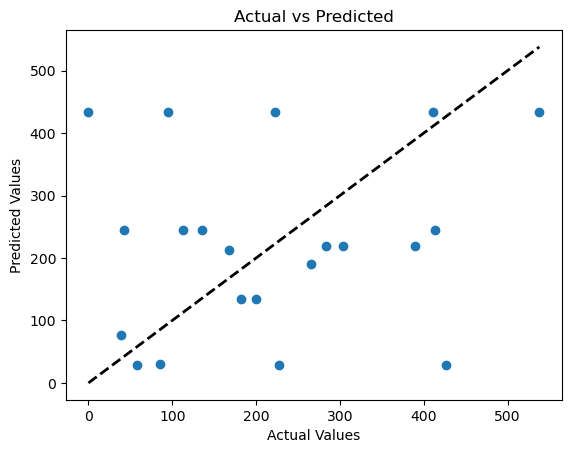

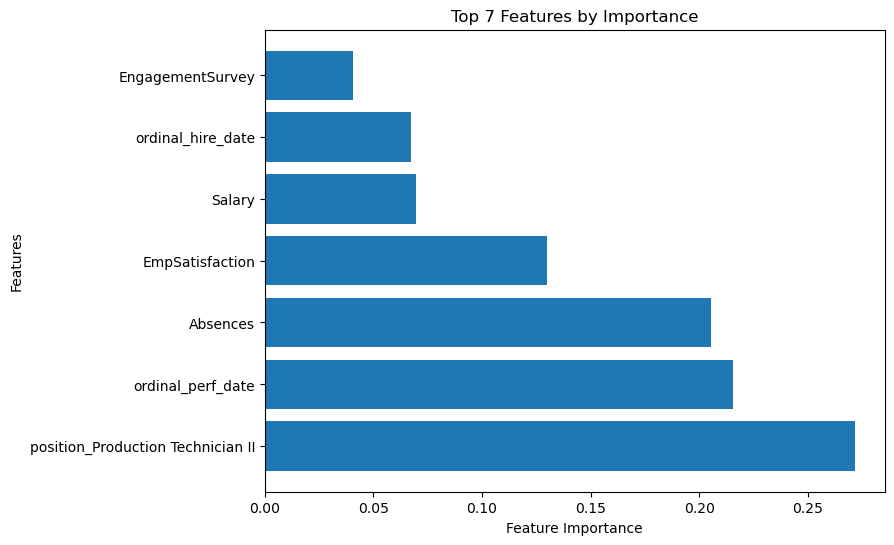

In [34]:
#Decision tree regressor
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(terminated_hr_data_regression, terminated_regression_target, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()

parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

y_pred = y_pred.clip(min=0)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", best_params)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

feature_importance = best_model.feature_importances_
top_features_indices = feature_importance.argsort()[-7:][::-1]  # Indices of top 7 features

top_feature_names = terminated_hr_data_regression.columns[top_features_indices]
top_feature_importance = feature_importance[top_features_indices]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 7 Features by Importance")
plt.show()

#We can see that the level of commitment feeling of the employee and his satisfaction can contribute to the prediction of days untill termination.
#It actually makes scence, since we know that the satisfaction of an employee may increase his motivation to stay in his job and by that it increases the amount of daay untill his termination.


Mean Squared Error: 20481.651347093477
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Mean Absolute Error (MAE): 115.32471880710985
R-squared Score: 0.05655285466888893


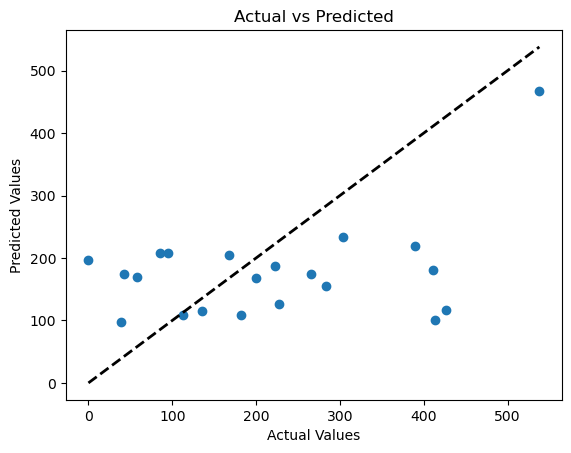

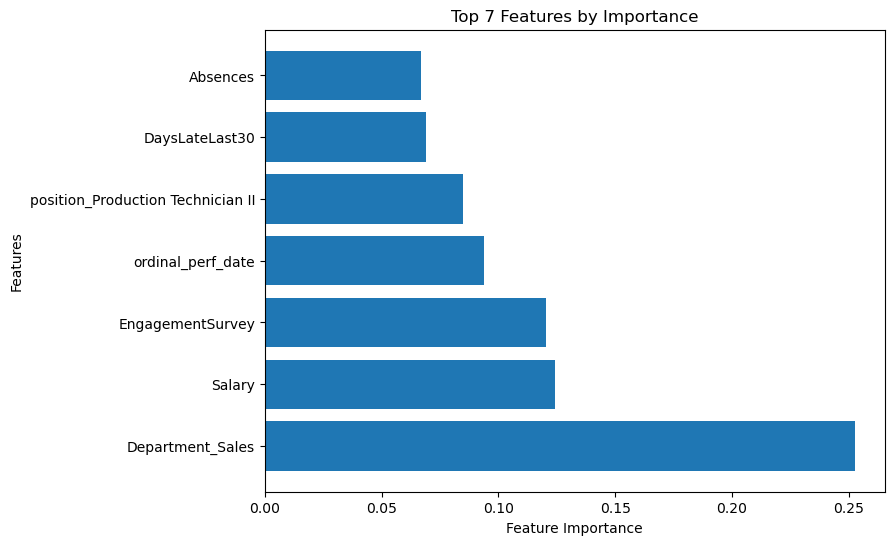

In [35]:
#Gradient Boosting Regressor

import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(terminated_hr_data_regression, terminated_regression_target, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()

parameters = {
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

y_pred = y_pred.clip(min=0)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", best_params)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

feature_importance = best_model.feature_importances_
top_features_indices = feature_importance.argsort()[-7:][::-1]  # Indices of top 7 features

top_feature_names = terminated_hr_data_regression.columns[top_features_indices]
top_feature_importance = feature_importance[top_features_indices]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 7 Features by Importance")
plt.show()

#We can see that the level of commitment feeling of the employee and his satisfaction can contribute to the prediction of days untill termination.
#It actually makes scence, since we know that the satisfaction of an employee may increase his motivation to stay in his job and by that it increases the amount of daay untill his termination.
#Besides of the commitment level of the employee, we can colclude that the more money an employee gets on his salary the more he will stay in his job
#the performance of an employee which are reflected by some features such as 'Absences' and 'DyasLateLast30', can contribute a lot for the prediction. If an employee has high values in those feture he has more probability to end his employment earlier.


Mean Squared Error: 21257.452483364796
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Absolute Error (MAE): 116.99925024050022
R-squared Score: 0.020817095136800412


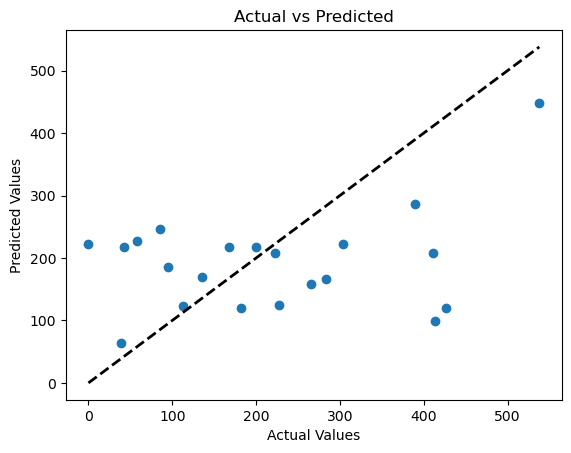

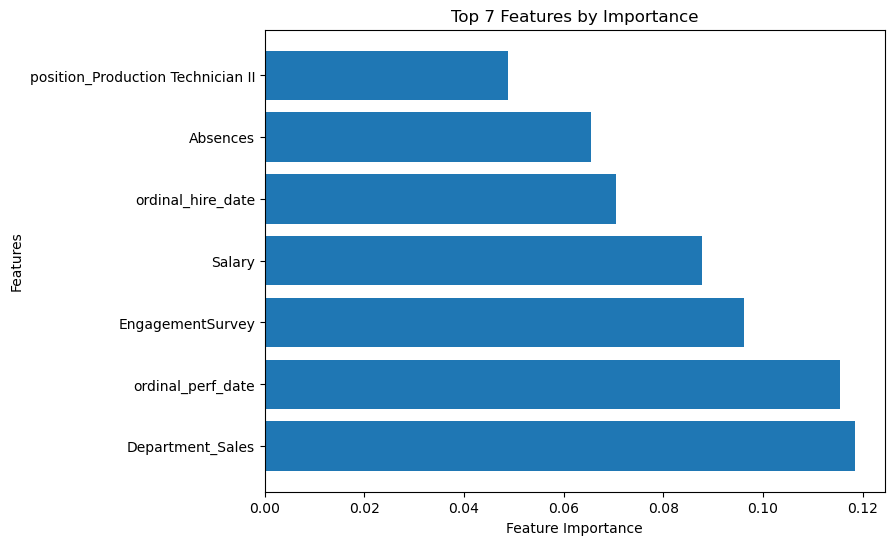

In [36]:
#Random Forest regressor
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(terminated_hr_data_regression, terminated_regression_target, test_size=0.2, random_state=42)

model = RandomForestRegressor()

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

y_pred = y_pred.clip(min=0)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", best_params)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

feature_importance = best_model.feature_importances_
top_features_indices = feature_importance.argsort()[-7:][::-1]  # Indices of top 7 features

top_feature_names = terminated_hr_data_regression.columns[top_features_indices]
top_feature_importance = feature_importance[top_features_indices]

plt.figure(figsize=(8, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 7 Features by Importance")
plt.show()
#We can see that the level of commitment feeling of the employee and his satisfaction can contribute to the prediction of days untill termination.
#It actually makes scence, since we know that the satisfaction of an employee may increase his motivation to stay in his job and by that it increases the amount of daay untill his termination.
#Besides of the commitment level of the employee, we can colclude that the more money an employee gets on his salary the more he will stay in his job
#the performance of an employee which are reflected by some features such as 'Absences' and 'DyasLateLast30', can contribute a lot for the prediction. If an employee has high values in those feture he has more probability to end his employment earlier.


In [37]:
#Adding the predicted target label to the data
active_predicted_termination=best_model.predict(active_reg)

active_reg['Predicted_Termination']=active_predicted_termination
print(active_reg)

     PerfScoreID    Salary  EngagementSurvey  EmpSatisfaction  \
0       1.660019 -0.295892          0.616027         1.187469   
1      -0.024412 -0.206092          0.923916         1.187469   
2       1.660019 -0.474338          1.129176         1.187469   
3      -0.024412  0.902200         -1.385255        -0.959309   
4      -0.024412 -0.409399          1.129176         0.114080   
..           ...       ...               ...              ...   
202    -0.024412 -0.370335         -0.923420         0.114080   
203    -0.024412 -0.173496         -0.063896         0.114080   
204     1.660019  5.411758          0.616027         1.187469   
205    -0.024412  0.672078          1.129176        -0.959309   
206    -0.024412 -0.926848          0.487739         1.187469   

     SpecialProjectsCount  DaysLateLast30  Absences  ordinal_perf_date  \
0               -0.579332       -0.274618 -1.514158          -0.776313   
1               -0.579332       -0.274618  0.886296          -1.633364 